# 6.2 ESA Task 6.2 Exploring relationships - Part 1 - United States

## Table of Contents

### 01. Import libraries and datasets

### 02. Verify dataset import results

### 03. Combine dataframe subsets for EDA

### 04. EDA (Exploratory Data Analysis)

>#### 04.01 Correlation matrix heatmaps

>>##### United States

>#### 04.02 Scatterplots

>>##### United States

>#### 04.03 Pair Plots

>>##### United States

>#### 04.04 Categorical Plots

>>##### United States

>>>##### Scatterplots & stacked bar histograms with categorical exogenous shock variable overlay

>#### 04.05 EDA preliminary findings

### 01. Import libraries and datasets

In [3]:
import pandas as pd
import numpy as np
import os

# Import visualization libraries

import seaborn as sns
import matplotlib.pyplot as plt

In [394]:
# Create string path to main project folder, to use with a Python shortcut for importing files

path = r'C:\Users\dirk8\CareerFoundry Projects\05-2025 Exogenous Shocks Analysis'

# Import first dataset

fx_vix_comm = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'fx_vix_comm_pre_stat.pkl'))

# Import seven (7) country-level subset datasets

ctry_us = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'us_pre_stat.pkl'))
ctry_germany = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'germany_pre_stat.pkl'))
ctry_japan = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'japan_pre_stat.pkl'))
ctry_south_korea = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'south_korea_pre_stat.pkl'))
ctry_australia = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'australia_pre_stat.pkl'))
ctry_norway = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'norway_pre_stat.pkl'))
ctry_switzerland = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'switzerland_pre_stat.pkl'))

### 02. Verify dataset import results

In [14]:
# Check the dimensions
fx_vix_comm.shape

(243, 74)

In [16]:
# Check the last 3 rows
fx_vix_comm.tail(3)

,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
240,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,True,...,0.021216,-0.011698,0.437476,0.343717,-0.046635,-0.274710,0.072208,0.155268,0.286810,0.000664
241,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,True,...,-0.076930,-0.084259,0.637948,0.512185,0.009276,-0.151745,0.116488,0.197657,0.358192,-0.017491
242,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,True,...,-0.174869,-0.169132,0.433658,0.378025,0.043760,-0.061186,0.113314,0.173413,0.323844,-0.050646


In [26]:
# Check the dimensions and last 3 rows of the country-level subset dataframes
ctry_us.shape

(243, 29)

In [28]:
ctry_us.tail(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,population,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg
5343,United States,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,...,347300000.0,-0.01,-0.0093,0.0057,0.151096,0.029607,0.037657,0.01784,0.077962,0.02117
5344,United States,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,...,347300000.0,-0.01,-0.0088,0.0024,0.144901,0.027793,0.037657,0.01784,0.050010,0.02117
5345,United States,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,...,347300000.0,-0.01,-0.0100,0.0007,0.077757,0.023622,0.037657,0.01784,0.050010,0.02117


In [30]:
ctry_germany.shape

(243, 31)

In [32]:
ctry_germany.tail(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,fx_to_usd_logret12,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg
2184,Germany,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,...,0.052922,-0.0098,-0.0123,0.0031,0.167592,0.022727,0.01661,0.0,0.089612,-0.005643
2185,Germany,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,...,0.031749,-0.0118,-0.0140,0.0008,0.214026,0.022632,0.01661,0.0,0.058841,-0.005643
2186,Germany,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,...,0.000000,-0.0137,-0.0148,0.0039,0.199351,0.021676,0.01661,0.0,0.058841,-0.005643


In [34]:
ctry_japan.shape

(243, 29)

In [36]:
ctry_japan.tail(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,population,fx_to_usd_logret12,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg
2913,Japan,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,...,123103479.0,0.071828,0.0030,0.0075,0.0052,0.10376,0.043887,0.005982,0.000000,-0.005249
2914,Japan,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,...,123103479.0,0.016723,0.0049,0.0076,0.0066,0.04992,0.043887,0.005982,-0.080043,-0.005249
2915,Japan,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,...,123103479.0,-0.003815,0.0046,0.0068,0.0076,0.00578,0.043887,0.005982,-0.080043,-0.005249


In [38]:
ctry_south_korea.shape

(243, 31)

In [40]:
ctry_south_korea.tail(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,fx_to_usd_logret12,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg
4128,South Korea,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,...,0.090444,-0.0042,-0.0070,-0.0053,-0.007678,0.022216,-0.042029,0.00995,0.000000,-0.000978
4129,South Korea,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,...,0.082512,-0.0062,-0.0074,-0.0060,-0.019463,0.020058,-0.042029,0.00995,0.000000,-0.000978
4130,South Korea,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,...,0.090493,-0.0072,-0.0081,-0.0059,-0.042971,0.020354,-0.042029,0.00995,-0.036368,-0.000978


In [42]:
ctry_australia.shape

(243, 29)

In [44]:
ctry_australia.tail(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,population,fx_to_usd_logret12,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg
240,Australia,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,...,27670000.0,0.070769,0.0000,-0.0002,0.0033,0.103963,-0.026012,0.015873,0.007326,0.013204
241,Australia,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,...,27670000.0,0.038466,-0.0010,-0.0017,0.0028,0.096376,-0.026012,0.015873,0.082309,0.013204
242,Australia,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,...,27670000.0,0.045024,-0.0025,-0.0023,0.0038,0.024064,-0.026012,0.015873,0.048050,0.013204


In [46]:
ctry_norway.shape

(243, 31)

In [48]:
ctry_norway.tail(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,fx_to_usd_logret12,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg
3642,Norway,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,...,0.087412,0.0,-0.0010,0.0038,0.128220,0.023213,0.034977,0.020783,-0.195745,0.008322
3643,Norway,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,...,0.059788,0.0,-0.0020,0.0018,0.158825,0.034909,0.034977,0.020783,0.082238,0.008322
3644,Norway,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,...,0.007512,0.0,-0.0016,0.0041,0.140900,0.026053,0.034977,0.020783,-0.051293,0.008322


In [50]:
ctry_switzerland.shape

(243, 29)

In [52]:
ctry_switzerland.tail(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,population,fx_to_usd_logret12,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,population_pct_chg
4857,Switzerland,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,...,8967407.0,0.056512,-0.0122,-0.0128,-0.0045,0.061440,0.004024,0.003562,0.00896,0.005091
4858,Switzerland,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,...,8967407.0,0.022473,-0.0130,-0.0133,-0.0043,0.110014,0.003256,0.003562,0.00896,0.005091
4859,Switzerland,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,...,8967407.0,-0.011300,-0.0119,-0.0119,-0.0013,0.093164,0.003441,0.003562,0.00896,0.005091


### 03. Combine dataframe subsets for EDA

#### United States

In [58]:
# Check for candidate target columns from ctry_us
ctry_us.columns

Index(['country', 'timestamp', 'year', 'month', 'year_month', 'month_text',
       'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag',
       'boj_int_rate_flag', 'int_rate_ovn', 'int_rate_3m', 'int_rate_10y',
       'stock_index', 'cons_prices', 'gdp_pc_usd', 'real_gdp_chg_pct',
       'unemp_rate', 'population', 'int_rate_ovn_diff', 'int_rate_3m_diff',
       'int_rate_10y_diff', 'stock_index_logret12', 'cons_prices_logret12',
       'gdp_pc_usd_logret12', 'real_gdp_chg_pct_logret12',
       'unemp_rate_logret12', 'population_pct_chg'],
      dtype='object')

In [62]:
# Check for candidate target columns from fx_vix_comm
fx_vix_comm.columns

Index(['timestamp', 'year', 'month', 'year_month', 'month_text', 'gfc_flag',
       'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag', 'boj_int_rate_flag',
       'aud_cad', 'aud_jpy', 'chf_aud', 'chf_cad', 'chf_jpy', 'eur_aud',
       'eur_cad', 'eur_chf', 'eur_gbp', 'eur_jpy', 'eur_usd', 'gbp_aud',
       'gbp_cad', 'gbp_jpy', 'gbp_usd', 'usd_aud', 'usd_cad', 'usd_chf',
       'usd_jpy', 'vix_avg', 'all_comm_idx_avg', 'energy_idx_avg', 'wti_avg',
       'brent_avg', 'nat_gas_eu_avg', 'lng_asia_avg', 'metals_idx_avg',
       'iron_ore_avg', 'copper_avg', 'aluminum_avg', 'gold_oz_usd',
       'food_idx_avg', 'aud_cad_logret12', 'aud_jpy_logret12',
       'chf_aud_logret12', 'chf_cad_logret12', 'chf_jpy_logret12',
       'eur_aud_logret12', 'eur_cad_logret12', 'eur_chf_logret12',
       'eur_gbp_logret12', 'eur_jpy_logret12', 'eur_usd_logret12',
       'gbp_aud_logret12', 'gbp_cad_logret12', 'gbp_jpy_logret12',
       'gbp_usd_logret12', 'usd_aud_logret12', 'usd_cad_logret12',
       'usd_c

In [78]:
# Select specific columns from each dataframe, to form 2 subset dataframes which will be combined (merged, in this case)
# Select the first-step transformed variables rather than original variables for more meaningful EDA
df1 = ctry_us[['country', 'timestamp', 'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag', 'boj_int_rate_flag',\
               'int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff', 'stock_index_logret12', 'cons_prices_logret12',\
               'gdp_pc_usd_logret12', 'real_gdp_chg_pct_logret12', 'unemp_rate_logret12', 'population_pct_chg']]
df2 = fx_vix_comm[['timestamp', 'vix_avg_logret12', 'eur_usd_logret12','gbp_usd_logret12', 'usd_aud_logret12', 'usd_cad_logret12',\
                   'usd_chf_logret12', 'usd_jpy_logret12']]

In [80]:
df1.shape

(243, 16)

In [82]:
df2.shape

(243, 8)

In [139]:
# Merge df1 and df2 subset dataframes using a left join, which ensures that all rows from df1 are retained
# Note: from prior work creating the parent dataframes, we know that the 'timestamp' values should match precisely, in chronological order
ctry_us_merge = pd.merge(df1, df2, on='timestamp', how='left')

In [141]:
# Check the dimensions
ctry_us_merge.shape

(243, 23)

In [143]:
# Check the last 3 rows
ctry_us_merge.tail(3)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,...,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,vix_avg_logret12,eur_usd_logret12,gbp_usd_logret12,usd_aud_logret12,usd_cad_logret12,usd_chf_logret12,usd_jpy_logret12
240,United States,2025-01-01,False,False,False,True,True,-0.01,-0.0093,0.0057,...,0.01784,0.077962,0.02117,0.224487,-0.046957,-0.032003,0.064125,0.071973,0.056512,0.068870
241,United States,2025-02-01,False,False,False,True,True,-0.01,-0.0088,0.0024,...,0.01784,0.050010,0.02117,0.193819,-0.037740,-0.007968,0.038466,0.057570,0.022473,0.013870
242,United States,2025-03-01,False,False,False,True,True,-0.01,-0.0100,0.0007,...,0.01784,0.050010,0.02117,0.459799,-0.009217,0.015625,0.038466,0.064539,-0.011300,-0.004817


In [145]:
# Check middle columns of last 3 rows
ctry_us_merge.iloc[240:243, 9:14]

,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12
240,0.0057,0.151096,0.029607,0.037657,0.01784
241,0.0024,0.144901,0.027793,0.037657,0.01784
242,0.0007,0.077757,0.023622,0.037657,0.01784


In [147]:
# Check the first 15 rows
ctry_us_merge.head(15)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,...,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,vix_avg_logret12,eur_usd_logret12,gbp_usd_logret12,usd_aud_logret12,usd_cad_logret12,usd_chf_logret12,usd_jpy_logret12
0,United States,2005-01-01,False,False,False,False,False,NaN,NaN,NaN,...,0.034401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,United States,2005-02-01,False,False,False,False,False,NaN,NaN,NaN,...,0.034401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,United States,2005-03-01,False,False,False,False,False,NaN,NaN,NaN,...,0.034401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,United States,2005-04-01,False,False,False,False,False,NaN,NaN,NaN,...,0.034401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United States,2005-05-01,False,False,False,False,False,NaN,NaN,NaN,...,0.034401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,United States,2005-06-01,False,False,False,False,False,NaN,NaN,NaN,...,0.034401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,United States,2005-07-01,False,False,False,False,False,NaN,NaN,NaN,...,0.034401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,United States,2005-08-01,False,False,False,False,False,NaN,NaN,NaN,...,0.034401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,United States,2005-09-01,False,False,False,False,False,NaN,NaN,NaN,...,0.034401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,United States,2005-10-01,False,False,False,False,False,NaN,NaN,NaN,...,0.034401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Comment: As expected, prior first-step numerical variable transformations in Task 6.1 into log returns (annual), etc. created NaNs for the first 12 months of monthly data for the transformed variables.  Therefore, the first 12 rows of data (index 0 - 11) here can be deleted to facilitate EDA.  This removes the 2005 data, which does not coincide with any exogenous economic shock periods, shortening the temporal scope for analysis from 20 years, 3 months to 19 years, 3 months.

In [150]:
# Delete first 12 rows and overwrite the subset merged dataframe
ctry_us_merge.drop(index=range(12), inplace=True)

In [133]:
# Check the dimensions
ctry_us_merge.shape

(231, 23)

In [152]:
# Check the first 3 rows
ctry_us_merge.head(3)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,...,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,vix_avg_logret12,eur_usd_logret12,gbp_usd_logret12,usd_aud_logret12,usd_cad_logret12,usd_chf_logret12,usd_jpy_logret12
12,United States,2006-01-01,False,False,False,False,False,0.0201,0.0195,0.0020,...,0.027615,-0.120144,0.009689,-0.110001,-0.094559,-0.065958,0.022642,-0.042200,0.098440,0.122941
13,United States,2006-02-01,False,False,False,False,False,0.0199,0.0195,0.0040,...,0.027615,-0.117783,0.009689,0.062883,-0.088411,-0.071656,0.053245,-0.075349,0.088411,0.116280
14,United States,2006-03-01,False,False,False,False,False,0.0196,0.0191,0.0022,...,0.027615,-0.101096,0.009689,-0.116166,-0.095310,-0.093218,0.075794,-0.050431,0.113023,0.108494


In [154]:
# Reset the index (the argument "drop=True" drops the original index)
ctry_us_merge.reset_index(drop=True, inplace=True)

In [156]:
# Check the first 3 rows
ctry_us_merge.head(3)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,...,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,vix_avg_logret12,eur_usd_logret12,gbp_usd_logret12,usd_aud_logret12,usd_cad_logret12,usd_chf_logret12,usd_jpy_logret12
0,United States,2006-01-01,False,False,False,False,False,0.0201,0.0195,0.0020,...,0.027615,-0.120144,0.009689,-0.110001,-0.094559,-0.065958,0.022642,-0.042200,0.098440,0.122941
1,United States,2006-02-01,False,False,False,False,False,0.0199,0.0195,0.0040,...,0.027615,-0.117783,0.009689,0.062883,-0.088411,-0.071656,0.053245,-0.075349,0.088411,0.116280
2,United States,2006-03-01,False,False,False,False,False,0.0196,0.0191,0.0022,...,0.027615,-0.101096,0.009689,-0.116166,-0.095310,-0.093218,0.075794,-0.050431,0.113023,0.108494


In [158]:
# Check the last 3 rows
ctry_us_merge.tail(3)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,...,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,vix_avg_logret12,eur_usd_logret12,gbp_usd_logret12,usd_aud_logret12,usd_cad_logret12,usd_chf_logret12,usd_jpy_logret12
228,United States,2025-01-01,False,False,False,True,True,-0.01,-0.0093,0.0057,...,0.01784,0.077962,0.02117,0.224487,-0.046957,-0.032003,0.064125,0.071973,0.056512,0.068870
229,United States,2025-02-01,False,False,False,True,True,-0.01,-0.0088,0.0024,...,0.01784,0.050010,0.02117,0.193819,-0.037740,-0.007968,0.038466,0.057570,0.022473,0.013870
230,United States,2025-03-01,False,False,False,True,True,-0.01,-0.0100,0.0007,...,0.01784,0.050010,0.02117,0.459799,-0.009217,0.015625,0.038466,0.064539,-0.011300,-0.004817


In [160]:
# Export the country = US subset merged dataframe as backup, before conducting EDA
ctry_us_merge.to_pickle(os.path.join(path, 'Data','Prepared Data', 'ctry_us_merge.pkl'))

#### Germany

In [164]:
# Check for candidate target columns from ctry_germany
ctry_germany.columns

Index(['country', 'timestamp', 'year', 'month', 'year_month', 'month_text',
       'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag',
       'boj_int_rate_flag', 'fx_to_usd', 'int_rate_ovn', 'int_rate_3m',
       'int_rate_10y', 'stock_index', 'cons_prices', 'gdp_pc_usd',
       'real_gdp_chg_pct', 'unemp_rate', 'population', 'fx_to_usd_logret12',
       'int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff',
       'stock_index_logret12', 'cons_prices_logret12', 'gdp_pc_usd_logret12',
       'real_gdp_chg_pct_logret12', 'unemp_rate_logret12',
       'population_pct_chg'],
      dtype='object')

In [168]:
# Select specific columns from each dataframe, to form 2 subset dataframes which will be combined (merged, in this case)
# Select the first-step transformed variables rather than original variables for more meaningful EDA
df1 = ctry_germany[['country', 'timestamp', 'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag', 'boj_int_rate_flag',\
               'int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff', 'stock_index_logret12', 'cons_prices_logret12',\
               'gdp_pc_usd_logret12', 'real_gdp_chg_pct_logret12', 'unemp_rate_logret12', 'population_pct_chg']]
df2 = fx_vix_comm[['timestamp', 'vix_avg_logret12', 'eur_usd_logret12','eur_aud_logret12', 'eur_cad_logret12', 'eur_chf_logret12',\
                'eur_gbp_logret12', 'eur_jpy_logret12']]

In [170]:
df1.shape

(243, 16)

In [172]:
df2.shape

(243, 8)

In [174]:
# Merge df1 and df2 subset dataframes using a left join, which ensures that all rows from df1 are retained
# Note: from prior work creating the parent dataframes, we know that the 'timestamp' values should match precisely, in chronological order
ctry_germany_merge = pd.merge(df1, df2, on='timestamp', how='left')

In [176]:
ctry_germany_merge.shape

(243, 23)

In [178]:
ctry_germany_merge.tail(3)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,...,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,vix_avg_logret12,eur_usd_logret12,eur_aud_logret12,eur_cad_logret12,eur_chf_logret12,eur_gbp_logret12,eur_jpy_logret12
240,Germany,2025-01-01,False,False,False,True,True,-0.0098,-0.0123,0.0031,...,0.0,0.089612,-0.005643,0.224487,-0.046957,0.012121,0.020340,0.000000,-0.023530,0.017037
241,Germany,2025-02-01,False,False,False,True,True,-0.0118,-0.0140,0.0008,...,0.0,0.058841,-0.005643,0.193819,-0.037740,0.000000,0.020340,-0.010582,-0.023811,-0.021275
242,Germany,2025-03-01,False,False,False,True,True,-0.0137,-0.0148,0.0039,...,0.0,0.058841,-0.005643,0.459799,-0.009217,0.035507,0.052993,-0.010363,-0.023530,-0.010866


In [180]:
ctry_germany_merge.head(15)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,...,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,vix_avg_logret12,eur_usd_logret12,eur_aud_logret12,eur_cad_logret12,eur_chf_logret12,eur_gbp_logret12,eur_jpy_logret12
0,Germany,2005-01-01,False,False,False,False,False,NaN,NaN,NaN,...,0.008960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Germany,2005-02-01,False,False,False,False,False,NaN,NaN,NaN,...,0.008960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Germany,2005-03-01,False,False,False,False,False,NaN,NaN,NaN,...,0.008960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Germany,2005-04-01,False,False,False,False,False,NaN,NaN,NaN,...,0.008960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Germany,2005-05-01,False,False,False,False,False,NaN,NaN,NaN,...,0.008960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Germany,2005-06-01,False,False,False,False,False,NaN,NaN,NaN,...,0.008960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Germany,2005-07-01,False,False,False,False,False,NaN,NaN,NaN,...,0.008960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Germany,2005-08-01,False,False,False,False,False,NaN,NaN,NaN,...,0.008960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Germany,2005-09-01,False,False,False,False,False,NaN,NaN,NaN,...,0.008960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Germany,2005-10-01,False,False,False,False,False,NaN,NaN,NaN,...,0.008960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
# As for the United States (above), delete first 12 rows and overwrite the subset merged dataframe
ctry_germany_merge.drop(index=range(12), inplace=True)

In [184]:
ctry_germany_merge.shape

(231, 23)

In [186]:
ctry_germany_merge.head(3)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,...,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,vix_avg_logret12,eur_usd_logret12,eur_aud_logret12,eur_cad_logret12,eur_chf_logret12,eur_gbp_logret12,eur_jpy_logret12
12,Germany,2006-01-01,False,False,False,False,False,0.0025,0.0036,-0.0024,...,0.038259,-0.009390,-0.001127,-0.110001,-0.094559,-0.071459,-0.139762,0.000000,-0.028573,0.030158
13,Germany,2006-02-01,False,False,False,False,False,0.0029,0.0046,-0.0007,...,0.038259,-0.037388,-0.001127,0.062883,-0.088411,-0.030583,-0.161423,0.006431,-0.014599,0.031939
14,Germany,2006-03-01,False,False,False,False,False,0.0046,0.0058,-0.0006,...,0.038259,-0.037388,-0.001127,-0.116166,-0.095310,-0.018019,-0.146930,0.012821,0.000000,0.014661


In [188]:
# As for the United States (above), reset the index (the argument "drop=True" drops the original index)
ctry_germany_merge.reset_index(drop=True, inplace=True)

In [190]:
# Check the first 3 rows
ctry_germany_merge.head(3)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,...,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,vix_avg_logret12,eur_usd_logret12,eur_aud_logret12,eur_cad_logret12,eur_chf_logret12,eur_gbp_logret12,eur_jpy_logret12
0,Germany,2006-01-01,False,False,False,False,False,0.0025,0.0036,-0.0024,...,0.038259,-0.009390,-0.001127,-0.110001,-0.094559,-0.071459,-0.139762,0.000000,-0.028573,0.030158
1,Germany,2006-02-01,False,False,False,False,False,0.0029,0.0046,-0.0007,...,0.038259,-0.037388,-0.001127,0.062883,-0.088411,-0.030583,-0.161423,0.006431,-0.014599,0.031939
2,Germany,2006-03-01,False,False,False,False,False,0.0046,0.0058,-0.0006,...,0.038259,-0.037388,-0.001127,-0.116166,-0.095310,-0.018019,-0.146930,0.012821,0.000000,0.014661


In [192]:
# Check the last 3 rows
ctry_germany_merge.tail(3)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,...,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,vix_avg_logret12,eur_usd_logret12,eur_aud_logret12,eur_cad_logret12,eur_chf_logret12,eur_gbp_logret12,eur_jpy_logret12
228,Germany,2025-01-01,False,False,False,True,True,-0.0098,-0.0123,0.0031,...,0.0,0.089612,-0.005643,0.224487,-0.046957,0.012121,0.020340,0.000000,-0.023530,0.017037
229,Germany,2025-02-01,False,False,False,True,True,-0.0118,-0.0140,0.0008,...,0.0,0.058841,-0.005643,0.193819,-0.037740,0.000000,0.020340,-0.010582,-0.023811,-0.021275
230,Germany,2025-03-01,False,False,False,True,True,-0.0137,-0.0148,0.0039,...,0.0,0.058841,-0.005643,0.459799,-0.009217,0.035507,0.052993,-0.010363,-0.023530,-0.010866


In [194]:
# Export the country = Germany subset merged dataframe as backup, before conducting EDA
ctry_germany_merge.to_pickle(os.path.join(path, 'Data','Prepared Data', 'ctry_germany_merge.pkl'))

#### Japan

In [197]:
# Check for candidate target columns from ctry_japan
ctry_japan.columns

Index(['country', 'timestamp', 'year', 'month', 'year_month', 'month_text',
       'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag',
       'boj_int_rate_flag', 'fx_to_usd', 'int_rate_ovn', 'int_rate_3m',
       'int_rate_10y', 'stock_index', 'gdp_pc_usd', 'real_gdp_chg_pct',
       'unemp_rate', 'population', 'fx_to_usd_logret12', 'int_rate_ovn_diff',
       'int_rate_3m_diff', 'int_rate_10y_diff', 'stock_index_logret12',
       'gdp_pc_usd_logret12', 'real_gdp_chg_pct_logret12',
       'unemp_rate_logret12', 'population_pct_chg'],
      dtype='object')

In [199]:
# Select specific columns from each dataframe, to form 2 subset dataframes which will be combined (merged, in this case)
# Select the first-step transformed variables rather than original variables for more meaningful EDA
df1 = ctry_japan[['country', 'timestamp', 'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag', 'boj_int_rate_flag',\
               'int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff', 'stock_index_logret12',\
               'gdp_pc_usd_logret12', 'real_gdp_chg_pct_logret12', 'unemp_rate_logret12', 'population_pct_chg']]
df2 = fx_vix_comm[['timestamp', 'vix_avg_logret12', 'aud_jpy_logret12','chf_jpy_logret12', 'eur_jpy_logret12', 'gbp_jpy_logret12',\
                   'usd_jpy_logret12']]

In [201]:
df1.shape

(243, 15)

In [203]:
df2.shape

(243, 7)

In [205]:
# Merge df1 and df2 subset dataframes using a left join, which ensures that all rows from df1 are retained
# Note: from prior work creating the parent dataframes, we know that the 'timestamp' values should match precisely, in chronological order
ctry_japan_merge = pd.merge(df1, df2, on='timestamp', how='left')

In [207]:
ctry_japan_merge.shape

(243, 21)

In [209]:
ctry_japan_merge.tail(3)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,...,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,vix_avg_logret12,aud_jpy_logret12,chf_jpy_logret12,eur_jpy_logret12,gbp_jpy_logret12,usd_jpy_logret12
240,Japan,2025-01-01,False,False,False,True,True,0.0030,0.0075,0.0052,...,0.043887,0.005982,0.000000,-0.005249,0.224487,0.004112,0.010516,0.017037,0.040320,0.068870
241,Japan,2025-02-01,False,False,False,True,True,0.0049,0.0076,0.0066,...,0.043887,0.005982,-0.080043,-0.005249,0.193819,-0.020073,-0.015594,-0.021275,0.006908,0.013870
242,Japan,2025-03-01,False,False,False,True,True,0.0046,0.0068,0.0076,...,0.043887,0.005982,-0.080043,-0.005249,0.459799,-0.045619,0.000415,-0.010866,0.010141,-0.004817


In [211]:
ctry_japan_merge.head(15)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,...,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,vix_avg_logret12,aud_jpy_logret12,chf_jpy_logret12,eur_jpy_logret12,gbp_jpy_logret12,usd_jpy_logret12
0,Japan,2005-01-01,False,False,False,False,False,NaN,NaN,NaN,...,NaN,0.017840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Japan,2005-02-01,False,False,False,False,False,NaN,NaN,NaN,...,NaN,0.017840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Japan,2005-03-01,False,False,False,False,False,NaN,NaN,NaN,...,NaN,0.017840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Japan,2005-04-01,False,False,False,False,False,NaN,NaN,NaN,...,NaN,0.017840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Japan,2005-05-01,False,False,False,False,False,NaN,NaN,NaN,...,NaN,0.017840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Japan,2005-06-01,False,False,False,False,False,NaN,NaN,NaN,...,NaN,0.017840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Japan,2005-07-01,False,False,False,False,False,NaN,NaN,NaN,...,NaN,0.017840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Japan,2005-08-01,False,False,False,False,False,NaN,NaN,NaN,...,NaN,0.017840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Japan,2005-09-01,False,False,False,False,False,NaN,NaN,NaN,...,NaN,0.017840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Japan,2005-10-01,False,False,False,False,False,NaN,NaN,NaN,...,NaN,0.017840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [213]:
# As for the United States (above), delete first 12 rows and overwrite the subset merged dataframe
ctry_japan_merge.drop(index=range(12), inplace=True)

In [215]:
ctry_japan_merge.shape

(231, 21)

In [217]:
ctry_japan_merge.head(3)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,...,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,vix_avg_logret12,aud_jpy_logret12,chf_jpy_logret12,eur_jpy_logret12,gbp_jpy_logret12,usd_jpy_logret12
12,Japan,2006-01-01,False,False,False,False,False,0.0,0.0000,0.0024,...,-0.048682,0.013903,-0.022473,0.001037,-0.110001,0.100485,0.027940,0.030158,0.058636,0.122941
13,Japan,2006-02-01,False,False,False,False,False,0.0,0.0001,0.0018,...,-0.048682,0.013903,-0.115069,0.001037,0.062883,0.064805,0.026895,0.031939,0.041511,0.116280
14,Japan,2006-03-01,False,False,False,False,False,0.0,0.0005,0.0044,...,-0.048682,0.013903,-0.093090,0.001037,-0.116166,0.032516,0.002453,0.014661,0.020254,0.108494


In [219]:
# As for the United States (above), reset the index (the argument "drop=True" drops the original index)
ctry_japan_merge.reset_index(drop=True, inplace=True)

In [221]:
ctry_japan_merge.head(3)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,...,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,vix_avg_logret12,aud_jpy_logret12,chf_jpy_logret12,eur_jpy_logret12,gbp_jpy_logret12,usd_jpy_logret12
0,Japan,2006-01-01,False,False,False,False,False,0.0,0.0000,0.0024,...,-0.048682,0.013903,-0.022473,0.001037,-0.110001,0.100485,0.027940,0.030158,0.058636,0.122941
1,Japan,2006-02-01,False,False,False,False,False,0.0,0.0001,0.0018,...,-0.048682,0.013903,-0.115069,0.001037,0.062883,0.064805,0.026895,0.031939,0.041511,0.116280
2,Japan,2006-03-01,False,False,False,False,False,0.0,0.0005,0.0044,...,-0.048682,0.013903,-0.093090,0.001037,-0.116166,0.032516,0.002453,0.014661,0.020254,0.108494


In [223]:
ctry_japan_merge.tail(3)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,...,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,vix_avg_logret12,aud_jpy_logret12,chf_jpy_logret12,eur_jpy_logret12,gbp_jpy_logret12,usd_jpy_logret12
228,Japan,2025-01-01,False,False,False,True,True,0.0030,0.0075,0.0052,...,0.043887,0.005982,0.000000,-0.005249,0.224487,0.004112,0.010516,0.017037,0.040320,0.068870
229,Japan,2025-02-01,False,False,False,True,True,0.0049,0.0076,0.0066,...,0.043887,0.005982,-0.080043,-0.005249,0.193819,-0.020073,-0.015594,-0.021275,0.006908,0.013870
230,Japan,2025-03-01,False,False,False,True,True,0.0046,0.0068,0.0076,...,0.043887,0.005982,-0.080043,-0.005249,0.459799,-0.045619,0.000415,-0.010866,0.010141,-0.004817


In [225]:
# Export the country = Japan subset merged dataframe as backup, before conducting EDA
ctry_japan_merge.to_pickle(os.path.join(path, 'Data','Prepared Data', 'ctry_japan_merge.pkl'))

#### South Korea

In [228]:
# Check for candidate target columns from ctry_south_korea
ctry_south_korea.columns

Index(['country', 'timestamp', 'year', 'month', 'year_month', 'month_text',
       'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag',
       'boj_int_rate_flag', 'fx_to_usd', 'int_rate_ovn', 'int_rate_3m',
       'int_rate_10y', 'stock_index', 'cons_prices', 'gdp_pc_usd',
       'real_gdp_chg_pct', 'unemp_rate', 'population', 'fx_to_usd_logret12',
       'int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff',
       'stock_index_logret12', 'cons_prices_logret12', 'gdp_pc_usd_logret12',
       'real_gdp_chg_pct_logret12', 'unemp_rate_logret12',
       'population_pct_chg'],
      dtype='object')

In [230]:
# Select specific columns from each dataframe, to form 2 subset dataframes which will be combined (merged, in this case)
# Select the first-step transformed variables rather than original variables for more meaningful EDA
df1 = ctry_south_korea[['country', 'timestamp', 'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag', 'boj_int_rate_flag',\
               'int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff', 'stock_index_logret12', 'cons_prices_logret12',\
               'gdp_pc_usd_logret12', 'real_gdp_chg_pct_logret12', 'unemp_rate_logret12', 'population_pct_chg', 'fx_to_usd_logret12']]
df2 = fx_vix_comm[['timestamp', 'vix_avg_logret12']]

In [232]:
df1.shape

(243, 17)

In [234]:
df2.shape

(243, 2)

In [236]:
# Merge df1 and df2 subset dataframes using a left join, which ensures that all rows from df1 are retained
# Note: from prior work creating the parent dataframes, we know that the 'timestamp' values should match precisely, in chronological order
ctry_south_korea_merge = pd.merge(df1, df2, on='timestamp', how='left')

In [238]:
ctry_south_korea_merge.shape

(243, 18)

In [240]:
ctry_south_korea_merge.tail(3)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,fx_to_usd_logret12,vix_avg_logret12
240,South Korea,2025-01-01,False,False,False,True,True,-0.0042,-0.0070,-0.0053,-0.007678,0.022216,-0.042029,0.00995,0.000000,-0.000978,0.090444,0.224487
241,South Korea,2025-02-01,False,False,False,True,True,-0.0062,-0.0074,-0.0060,-0.019463,0.020058,-0.042029,0.00995,0.000000,-0.000978,0.082512,0.193819
242,South Korea,2025-03-01,False,False,False,True,True,-0.0072,-0.0081,-0.0059,-0.042971,0.020354,-0.042029,0.00995,-0.036368,-0.000978,0.090493,0.459799


In [242]:
ctry_south_korea_merge.head(15)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,fx_to_usd_logret12,vix_avg_logret12
0,South Korea,2005-01-01,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.043059,NaN,NaN,NaN,NaN
1,South Korea,2005-02-01,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.043059,NaN,NaN,NaN,NaN
2,South Korea,2005-03-01,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.043059,NaN,NaN,NaN,NaN
3,South Korea,2005-04-01,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.043059,NaN,NaN,NaN,NaN
4,South Korea,2005-05-01,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.043059,NaN,NaN,NaN,NaN
5,South Korea,2005-06-01,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.043059,NaN,NaN,NaN,NaN
6,South Korea,2005-07-01,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.043059,NaN,NaN,NaN,NaN
7,South Korea,2005-08-01,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.043059,NaN,NaN,NaN,NaN
8,South Korea,2005-09-01,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.043059,NaN,NaN,NaN,NaN
9,South Korea,2005-10-01,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.043059,NaN,NaN,NaN,NaN


In [244]:
# As for the United States (above), delete first 12 rows and overwrite the subset merged dataframe
ctry_south_korea_merge.drop(index=range(12), inplace=True)

In [246]:
ctry_south_korea_merge.shape

(231, 18)

In [248]:
ctry_south_korea_merge.head(3)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,fx_to_usd_logret12,vix_avg_logret12
12,South Korea,2006-01-01,False,False,False,False,False,0.0048,0.0068,0.0116,0.423264,0.022055,0.113968,0.050693,-0.111226,0.005266,-0.056028,-0.110001
13,South Korea,2006-02-01,False,False,False,False,False,0.0066,0.0066,0.0040,0.332493,0.019828,0.113968,0.050693,-0.028171,0.005266,-0.051202,0.062883
14,South Korea,2006-03-01,False,False,False,False,False,0.0072,0.0072,0.0065,0.298500,0.019710,0.113968,0.050693,-0.028171,0.005266,-0.033303,-0.116166


In [250]:
# As for the United States (above), reset the index (the argument "drop=True" drops the original index)
ctry_south_korea_merge.reset_index(drop=True, inplace=True)

In [252]:
ctry_south_korea_merge.head(3)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,fx_to_usd_logret12,vix_avg_logret12
0,South Korea,2006-01-01,False,False,False,False,False,0.0048,0.0068,0.0116,0.423264,0.022055,0.113968,0.050693,-0.111226,0.005266,-0.056028,-0.110001
1,South Korea,2006-02-01,False,False,False,False,False,0.0066,0.0066,0.0040,0.332493,0.019828,0.113968,0.050693,-0.028171,0.005266,-0.051202,0.062883
2,South Korea,2006-03-01,False,False,False,False,False,0.0072,0.0072,0.0065,0.298500,0.019710,0.113968,0.050693,-0.028171,0.005266,-0.033303,-0.116166


In [254]:
ctry_south_korea_merge.tail(3)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,fx_to_usd_logret12,vix_avg_logret12
228,South Korea,2025-01-01,False,False,False,True,True,-0.0042,-0.0070,-0.0053,-0.007678,0.022216,-0.042029,0.00995,0.000000,-0.000978,0.090444,0.224487
229,South Korea,2025-02-01,False,False,False,True,True,-0.0062,-0.0074,-0.0060,-0.019463,0.020058,-0.042029,0.00995,0.000000,-0.000978,0.082512,0.193819
230,South Korea,2025-03-01,False,False,False,True,True,-0.0072,-0.0081,-0.0059,-0.042971,0.020354,-0.042029,0.00995,-0.036368,-0.000978,0.090493,0.459799


In [256]:
# Export the country = South Korea subset merged dataframe as backup, before conducting EDA
ctry_south_korea_merge.to_pickle(os.path.join(path, 'Data','Prepared Data', 'ctry_south_korea_merge.pkl'))

#### Australia

In [259]:
# Check for candidate target columns from ctry_australia
ctry_australia.columns

Index(['country', 'timestamp', 'year', 'month', 'year_month', 'month_text',
       'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag',
       'boj_int_rate_flag', 'fx_to_usd', 'int_rate_ovn', 'int_rate_3m',
       'int_rate_10y', 'stock_index', 'gdp_pc_usd', 'real_gdp_chg_pct',
       'unemp_rate', 'population', 'fx_to_usd_logret12', 'int_rate_ovn_diff',
       'int_rate_3m_diff', 'int_rate_10y_diff', 'stock_index_logret12',
       'gdp_pc_usd_logret12', 'real_gdp_chg_pct_logret12',
       'unemp_rate_logret12', 'population_pct_chg'],
      dtype='object')

In [291]:
# Select specific columns from each dataframe, to form 2 subset dataframes which will be combined (merged, in this case)
# Select the first-step transformed variables rather than original variables for more meaningful EDA
df1 = ctry_australia[['country', 'timestamp', 'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag', 'boj_int_rate_flag',\
               'int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff', 'stock_index_logret12',\
               'gdp_pc_usd_logret12', 'real_gdp_chg_pct_logret12', 'unemp_rate_logret12', 'population_pct_chg']]
df2 = fx_vix_comm[['timestamp', 'vix_avg_logret12', 'aud_cad_logret12', 'aud_jpy_logret12', 'chf_aud_logret12', 'eur_aud_logret12',\
                   'gbp_aud_logret12', 'usd_aud_logret12', 'gold_oz_usd_logret12']]

In [293]:
df1.shape

(243, 15)

In [295]:
df2.shape

(243, 9)

In [297]:
# Merge df1 and df2 subset dataframes using a left join, which ensures that all rows from df1 are retained
# Note: from prior work creating the parent dataframes, we know that the 'timestamp' values should match precisely, in chronological order
ctry_australia_merge = pd.merge(df1, df2, on='timestamp', how='left')

In [299]:
ctry_australia_merge.shape

(243, 23)

In [301]:
ctry_australia_merge.tail(3)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,...,unemp_rate_logret12,population_pct_chg,vix_avg_logret12,aud_cad_logret12,aud_jpy_logret12,chf_aud_logret12,eur_aud_logret12,gbp_aud_logret12,usd_aud_logret12,gold_oz_usd_logret12
240,Australia,2025-01-01,False,False,False,True,True,0.0000,-0.0002,0.0033,...,0.007326,0.013204,0.224487,0.011173,0.004112,0.011364,0.012121,0.035994,0.064125,0.286810
241,Australia,2025-02-01,False,False,False,True,True,-0.0010,-0.0017,0.0028,...,0.082309,0.013204,0.193819,0.022473,-0.020073,0.005698,0.000000,0.025447,0.038466,0.358192
242,Australia,2025-03-01,False,False,False,True,True,-0.0025,-0.0023,0.0038,...,0.048050,0.013204,0.459799,0.011173,-0.045619,0.045462,0.035507,0.055152,0.038466,0.323844


In [303]:
ctry_australia_merge.head(15)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,...,unemp_rate_logret12,population_pct_chg,vix_avg_logret12,aud_cad_logret12,aud_jpy_logret12,chf_aud_logret12,eur_aud_logret12,gbp_aud_logret12,usd_aud_logret12,gold_oz_usd_logret12
0,Australia,2005-01-01,False,False,False,False,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Australia,2005-02-01,False,False,False,False,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Australia,2005-03-01,False,False,False,False,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Australia,2005-04-01,False,False,False,False,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Australia,2005-05-01,False,False,False,False,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Australia,2005-06-01,False,False,False,False,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Australia,2005-07-01,False,False,False,False,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Australia,2005-08-01,False,False,False,False,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Australia,2005-09-01,False,False,False,False,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Australia,2005-10-01,False,False,False,False,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [305]:
# As for the United States (above), delete first 12 rows and overwrite the subset merged dataframe
ctry_australia_merge.drop(index=range(12), inplace=True)

In [307]:
ctry_australia_merge.shape

(231, 23)

In [309]:
ctry_australia_merge.head(3)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,...,unemp_rate_logret12,population_pct_chg,vix_avg_logret12,aud_cad_logret12,aud_jpy_logret12,chf_aud_logret12,eur_aud_logret12,gbp_aud_logret12,usd_aud_logret12,gold_oz_usd_logret12
12,Australia,2006-01-01,False,False,False,False,False,0.0025,0.0021,-0.0015,...,0.017596,0.013586,-0.110001,-0.066691,0.100485,-0.074108,-0.071459,-0.041500,0.022642,0.259859
13,Australia,2006-02-01,False,False,False,False,False,0.0025,-0.0002,-0.0013,...,0.003929,0.013586,0.062883,-0.132060,0.064805,-0.038100,-0.030583,-0.020965,0.053245,0.270769
14,Australia,2006-03-01,False,False,False,False,False,0.0001,-0.0020,-0.0031,...,-0.057843,0.013586,-0.116166,-0.133531,0.032516,-0.028171,-0.018019,-0.012423,0.075794,0.250028


In [311]:
# As for the United States (above), reset the index (the argument "drop=True" drops the original index)
ctry_australia_merge.reset_index(drop=True, inplace=True)

In [313]:
ctry_australia_merge.head(3)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,...,unemp_rate_logret12,population_pct_chg,vix_avg_logret12,aud_cad_logret12,aud_jpy_logret12,chf_aud_logret12,eur_aud_logret12,gbp_aud_logret12,usd_aud_logret12,gold_oz_usd_logret12
0,Australia,2006-01-01,False,False,False,False,False,0.0025,0.0021,-0.0015,...,0.017596,0.013586,-0.110001,-0.066691,0.100485,-0.074108,-0.071459,-0.041500,0.022642,0.259859
1,Australia,2006-02-01,False,False,False,False,False,0.0025,-0.0002,-0.0013,...,0.003929,0.013586,0.062883,-0.132060,0.064805,-0.038100,-0.030583,-0.020965,0.053245,0.270769
2,Australia,2006-03-01,False,False,False,False,False,0.0001,-0.0020,-0.0031,...,-0.057843,0.013586,-0.116166,-0.133531,0.032516,-0.028171,-0.018019,-0.012423,0.075794,0.250028


In [315]:
ctry_australia_merge.tail(3)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,...,unemp_rate_logret12,population_pct_chg,vix_avg_logret12,aud_cad_logret12,aud_jpy_logret12,chf_aud_logret12,eur_aud_logret12,gbp_aud_logret12,usd_aud_logret12,gold_oz_usd_logret12
228,Australia,2025-01-01,False,False,False,True,True,0.0000,-0.0002,0.0033,...,0.007326,0.013204,0.224487,0.011173,0.004112,0.011364,0.012121,0.035994,0.064125,0.286810
229,Australia,2025-02-01,False,False,False,True,True,-0.0010,-0.0017,0.0028,...,0.082309,0.013204,0.193819,0.022473,-0.020073,0.005698,0.000000,0.025447,0.038466,0.358192
230,Australia,2025-03-01,False,False,False,True,True,-0.0025,-0.0023,0.0038,...,0.048050,0.013204,0.459799,0.011173,-0.045619,0.045462,0.035507,0.055152,0.038466,0.323844


In [317]:
# Export the country = Australia subset merged dataframe as backup, before conducting EDA
ctry_australia_merge.to_pickle(os.path.join(path, 'Data','Prepared Data', 'ctry_australia_merge.pkl'))

#### Norway

In [324]:
# Check for candidate target columns from ctry_norway
ctry_norway.columns

Index(['country', 'timestamp', 'year', 'month', 'year_month', 'month_text',
       'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag',
       'boj_int_rate_flag', 'fx_to_usd', 'int_rate_ovn', 'int_rate_3m',
       'int_rate_10y', 'stock_index', 'cons_prices', 'gdp_pc_usd',
       'real_gdp_chg_pct', 'unemp_rate', 'population', 'fx_to_usd_logret12',
       'int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff',
       'stock_index_logret12', 'cons_prices_logret12', 'gdp_pc_usd_logret12',
       'real_gdp_chg_pct_logret12', 'unemp_rate_logret12',
       'population_pct_chg'],
      dtype='object')

In [582]:
# Select specific columns from each dataframe, to form 2 subset dataframes which will be combined (merged, in this case)
# Select the first-step transformed variables rather than original variables for more meaningful EDA
df1 = ctry_norway[['country', 'timestamp', 'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag', 'boj_int_rate_flag',\
               'int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff', 'stock_index_logret12', 'cons_prices_logret12',\
               'gdp_pc_usd_logret12', 'real_gdp_chg_pct_logret12', 'unemp_rate_logret12', 'population_pct_chg', 'fx_to_usd_logret12']]
df2 = fx_vix_comm[['timestamp', 'vix_avg_logret12', 'brent_avg_logret12', 'nat_gas_eu_avg_logret12']]

In [584]:
df1.shape

(243, 17)

In [586]:
df2.shape

(243, 4)

In [588]:
# Merge df1 and df2 subset dataframes using a left join, which ensures that all rows from df1 are retained
# Note: from prior work creating the parent dataframes, we know that the 'timestamp' values should match precisely, in chronological order
ctry_norway_merge = pd.merge(df1, df2, on='timestamp', how='left')

In [590]:
ctry_norway_merge.shape

(243, 20)

In [592]:
ctry_norway_merge.tail(3)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,fx_to_usd_logret12,vix_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12
240,Norway,2025-01-01,False,False,False,True,True,0.0,-0.0010,0.0038,0.128220,0.023213,0.034977,0.020783,-0.195745,0.008322,0.087412,0.224487,-0.011698,0.437476
241,Norway,2025-02-01,False,False,False,True,True,0.0,-0.0020,0.0018,0.158825,0.034909,0.034977,0.020783,0.082238,0.008322,0.059788,0.193819,-0.084259,0.637948
242,Norway,2025-03-01,False,False,False,True,True,0.0,-0.0016,0.0041,0.140900,0.026053,0.034977,0.020783,-0.051293,0.008322,0.007512,0.459799,-0.169132,0.433658


In [594]:
ctry_norway_merge.head(15)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,fx_to_usd_logret12,vix_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12
0,Norway,2005-01-01,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.026642,NaN,NaN,NaN,NaN,NaN,NaN
1,Norway,2005-02-01,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.026642,NaN,NaN,NaN,NaN,NaN,NaN
2,Norway,2005-03-01,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.026642,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,2005-04-01,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.026642,NaN,NaN,NaN,NaN,NaN,NaN
4,Norway,2005-05-01,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.026642,NaN,NaN,NaN,NaN,NaN,NaN
5,Norway,2005-06-01,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.026642,NaN,NaN,NaN,NaN,NaN,NaN
6,Norway,2005-07-01,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.026642,NaN,NaN,NaN,NaN,NaN,NaN
7,Norway,2005-08-01,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.026642,NaN,NaN,NaN,NaN,NaN,NaN
8,Norway,2005-09-01,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.026642,NaN,NaN,NaN,NaN,NaN,NaN
9,Norway,2005-10-01,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.026642,NaN,NaN,NaN,NaN,NaN,NaN


In [596]:
# As for the United States (above), delete first 12 rows and overwrite the subset merged dataframe
ctry_norway_merge.drop(index=range(12), inplace=True)

In [598]:
ctry_norway_merge.shape

(231, 20)

In [600]:
ctry_norway_merge.head(3)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,fx_to_usd_logret12,vix_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12
12,Norway,2006-01-01,False,False,False,False,False,0.0053,0.0056,-0.0025,0.444747,0.018304,0.103961,0.024693,-0.068993,0.008085,0.059023,-0.110001,0.359997,0.414646
13,Norway,2006-02-01,False,False,False,False,False,0.0052,0.0065,-0.0005,0.426241,0.025502,0.103961,0.024693,-0.046520,0.008085,0.056374,0.062883,0.285218,0.414646
14,Norway,2006-03-01,False,False,False,False,False,0.0059,0.0070,-0.0018,0.441201,0.022990,0.103961,0.024693,-0.165080,0.008085,0.065444,-0.116166,0.164536,0.414646


In [602]:
# As for the United States (above), reset the index (the argument "drop=True" drops the original index)
ctry_norway_merge.reset_index(drop=True, inplace=True)

In [604]:
ctry_norway_merge.head(3)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,fx_to_usd_logret12,vix_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12
0,Norway,2006-01-01,False,False,False,False,False,0.0053,0.0056,-0.0025,0.444747,0.018304,0.103961,0.024693,-0.068993,0.008085,0.059023,-0.110001,0.359997,0.414646
1,Norway,2006-02-01,False,False,False,False,False,0.0052,0.0065,-0.0005,0.426241,0.025502,0.103961,0.024693,-0.046520,0.008085,0.056374,0.062883,0.285218,0.414646
2,Norway,2006-03-01,False,False,False,False,False,0.0059,0.0070,-0.0018,0.441201,0.022990,0.103961,0.024693,-0.165080,0.008085,0.065444,-0.116166,0.164536,0.414646


In [606]:
ctry_norway_merge.tail(3)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,fx_to_usd_logret12,vix_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12
228,Norway,2025-01-01,False,False,False,True,True,0.0,-0.0010,0.0038,0.128220,0.023213,0.034977,0.020783,-0.195745,0.008322,0.087412,0.224487,-0.011698,0.437476
229,Norway,2025-02-01,False,False,False,True,True,0.0,-0.0020,0.0018,0.158825,0.034909,0.034977,0.020783,0.082238,0.008322,0.059788,0.193819,-0.084259,0.637948
230,Norway,2025-03-01,False,False,False,True,True,0.0,-0.0016,0.0041,0.140900,0.026053,0.034977,0.020783,-0.051293,0.008322,0.007512,0.459799,-0.169132,0.433658


In [608]:
# Export the country = Norway subset merged dataframe as backup, before conducting EDA
ctry_norway_merge.to_pickle(os.path.join(path, 'Data','Prepared Data', 'ctry_norway_merge.pkl'))

#### Switzerland

In [355]:
# Check for candidate target columns from ctry_switzerland
ctry_switzerland.columns

Index(['country', 'timestamp', 'year', 'month', 'year_month', 'month_text',
       'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag',
       'boj_int_rate_flag', 'fx_to_usd', 'int_rate_ovn', 'int_rate_3m',
       'int_rate_10y', 'stock_index', 'cons_prices', 'gdp_pc_usd',
       'real_gdp_chg_pct', 'population', 'fx_to_usd_logret12',
       'int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff',
       'stock_index_logret12', 'cons_prices_logret12', 'gdp_pc_usd_logret12',
       'real_gdp_chg_pct_logret12', 'population_pct_chg'],
      dtype='object')

In [359]:
# Select specific columns from each dataframe, to form 2 subset dataframes which will be combined (merged, in this case)
# Select the first-step transformed variables rather than original variables for more meaningful EDA
df1 = ctry_switzerland[['country', 'timestamp', 'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag', 'boj_int_rate_flag',\
               'int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff', 'stock_index_logret12', 'cons_prices_logret12',\
               'gdp_pc_usd_logret12', 'real_gdp_chg_pct_logret12', 'population_pct_chg']]
df2 = fx_vix_comm[['timestamp', 'vix_avg_logret12', 'chf_aud_logret12', 'chf_cad_logret12', 'chf_jpy_logret12', 'eur_chf_logret12',\
                   'usd_chf_logret12', 'gold_oz_usd_logret12']]

In [361]:
df1.shape

(243, 15)

In [363]:
df2.shape

(243, 8)

In [365]:
# Merge df1 and df2 subset dataframes using a left join, which ensures that all rows from df1 are retained
# Note: from prior work creating the parent dataframes, we know that the 'timestamp' values should match precisely, in chronological order
ctry_switzerland_merge = pd.merge(df1, df2, on='timestamp', how='left')

In [367]:
ctry_switzerland_merge.shape

(243, 22)

In [369]:
ctry_switzerland_merge.tail(3)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,...,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,population_pct_chg,vix_avg_logret12,chf_aud_logret12,chf_cad_logret12,chf_jpy_logret12,eur_chf_logret12,usd_chf_logret12,gold_oz_usd_logret12
240,Switzerland,2025-01-01,False,False,False,True,True,-0.0122,-0.0128,-0.0045,...,0.003562,0.00896,0.005091,0.224487,0.011364,0.012739,0.010516,0.000000,0.056512,0.286810
241,Switzerland,2025-02-01,False,False,False,True,True,-0.0130,-0.0133,-0.0043,...,0.003562,0.00896,0.005091,0.193819,0.005698,0.025642,-0.015594,-0.010582,0.022473,0.358192
242,Switzerland,2025-03-01,False,False,False,True,True,-0.0119,-0.0119,-0.0013,...,0.003562,0.00896,0.005091,0.459799,0.045462,0.069870,0.000415,-0.010363,-0.011300,0.323844


In [371]:
ctry_switzerland_merge.head(15)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,...,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,population_pct_chg,vix_avg_logret12,chf_aud_logret12,chf_cad_logret12,chf_jpy_logret12,eur_chf_logret12,usd_chf_logret12,gold_oz_usd_logret12
0,Switzerland,2005-01-01,False,False,False,False,False,NaN,NaN,NaN,...,NaN,0.028587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Switzerland,2005-02-01,False,False,False,False,False,NaN,NaN,NaN,...,NaN,0.028587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Switzerland,2005-03-01,False,False,False,False,False,NaN,NaN,NaN,...,NaN,0.028587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Switzerland,2005-04-01,False,False,False,False,False,NaN,NaN,NaN,...,NaN,0.028587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Switzerland,2005-05-01,False,False,False,False,False,NaN,NaN,NaN,...,NaN,0.028587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Switzerland,2005-06-01,False,False,False,False,False,NaN,NaN,NaN,...,NaN,0.028587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Switzerland,2005-07-01,False,False,False,False,False,NaN,NaN,NaN,...,NaN,0.028587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Switzerland,2005-08-01,False,False,False,False,False,NaN,NaN,NaN,...,NaN,0.028587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Switzerland,2005-09-01,False,False,False,False,False,NaN,NaN,NaN,...,NaN,0.028587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Switzerland,2005-10-01,False,False,False,False,False,NaN,NaN,NaN,...,NaN,0.028587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [373]:
# As for the United States (above), delete first 12 rows and overwrite the subset merged dataframe
ctry_switzerland_merge.drop(index=range(12), inplace=True)

In [375]:
ctry_switzerland_merge.shape

(231, 22)

In [377]:
ctry_switzerland_merge.head(3)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,...,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,population_pct_chg,vix_avg_logret12,chf_aud_logret12,chf_cad_logret12,chf_jpy_logret12,eur_chf_logret12,usd_chf_logret12,gold_oz_usd_logret12
12,Switzerland,2006-01-01,False,False,False,False,False,0.0015,0.0027,-0.0010,...,0.049054,0.041142,0.006295,-0.110001,-0.074108,-0.133531,0.027940,0.000000,0.098440,0.259859
13,Switzerland,2006-02-01,False,False,False,False,False,0.0028,0.0032,-0.0013,...,0.049054,0.041142,0.006295,0.062883,-0.038100,-0.167054,0.026895,0.006431,0.088411,0.270769
14,Switzerland,2006-03-01,False,False,False,False,False,0.0028,0.0044,0.0016,...,0.049054,0.041142,0.006295,-0.116166,-0.028171,-0.155755,0.002453,0.012821,0.113023,0.250028


In [379]:
# As for the United States (above), reset the index (the argument "drop=True" drops the original index)
ctry_switzerland_merge.reset_index(drop=True, inplace=True)

In [381]:
ctry_switzerland_merge.head(3)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,...,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,population_pct_chg,vix_avg_logret12,chf_aud_logret12,chf_cad_logret12,chf_jpy_logret12,eur_chf_logret12,usd_chf_logret12,gold_oz_usd_logret12
0,Switzerland,2006-01-01,False,False,False,False,False,0.0015,0.0027,-0.0010,...,0.049054,0.041142,0.006295,-0.110001,-0.074108,-0.133531,0.027940,0.000000,0.098440,0.259859
1,Switzerland,2006-02-01,False,False,False,False,False,0.0028,0.0032,-0.0013,...,0.049054,0.041142,0.006295,0.062883,-0.038100,-0.167054,0.026895,0.006431,0.088411,0.270769
2,Switzerland,2006-03-01,False,False,False,False,False,0.0028,0.0044,0.0016,...,0.049054,0.041142,0.006295,-0.116166,-0.028171,-0.155755,0.002453,0.012821,0.113023,0.250028


In [383]:
ctry_switzerland_merge.tail(3)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,...,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,population_pct_chg,vix_avg_logret12,chf_aud_logret12,chf_cad_logret12,chf_jpy_logret12,eur_chf_logret12,usd_chf_logret12,gold_oz_usd_logret12
228,Switzerland,2025-01-01,False,False,False,True,True,-0.0122,-0.0128,-0.0045,...,0.003562,0.00896,0.005091,0.224487,0.011364,0.012739,0.010516,0.000000,0.056512,0.286810
229,Switzerland,2025-02-01,False,False,False,True,True,-0.0130,-0.0133,-0.0043,...,0.003562,0.00896,0.005091,0.193819,0.005698,0.025642,-0.015594,-0.010582,0.022473,0.358192
230,Switzerland,2025-03-01,False,False,False,True,True,-0.0119,-0.0119,-0.0013,...,0.003562,0.00896,0.005091,0.459799,0.045462,0.069870,0.000415,-0.010363,-0.011300,0.323844


In [385]:
# Export the country = Switzerland subset merged dataframe as backup, before conducting EDA
ctry_switzerland_merge.to_pickle(os.path.join(path, 'Data','Prepared Data', 'ctry_switzerland_merge.pkl'))

#### FX, VIX, commodity indices, commodities

In [388]:
fx_vix_comm.columns

Index(['timestamp', 'year', 'month', 'year_month', 'month_text', 'gfc_flag',
       'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag', 'boj_int_rate_flag',
       'aud_cad', 'aud_jpy', 'chf_aud', 'chf_cad', 'chf_jpy', 'eur_aud',
       'eur_cad', 'eur_chf', 'eur_gbp', 'eur_jpy', 'eur_usd', 'gbp_aud',
       'gbp_cad', 'gbp_jpy', 'gbp_usd', 'usd_aud', 'usd_cad', 'usd_chf',
       'usd_jpy', 'vix_avg', 'all_comm_idx_avg', 'energy_idx_avg', 'wti_avg',
       'brent_avg', 'nat_gas_eu_avg', 'lng_asia_avg', 'metals_idx_avg',
       'iron_ore_avg', 'copper_avg', 'aluminum_avg', 'gold_oz_usd',
       'food_idx_avg', 'aud_cad_logret12', 'aud_jpy_logret12',
       'chf_aud_logret12', 'chf_cad_logret12', 'chf_jpy_logret12',
       'eur_aud_logret12', 'eur_cad_logret12', 'eur_chf_logret12',
       'eur_gbp_logret12', 'eur_jpy_logret12', 'eur_usd_logret12',
       'gbp_aud_logret12', 'gbp_cad_logret12', 'gbp_jpy_logret12',
       'gbp_usd_logret12', 'usd_aud_logret12', 'usd_cad_logret12',
       'usd_c

In [412]:
# No merging needed for this dataframe, instead a subset dataframe is created for EDA
# As for the oecd_ctry subset merged dataframes created above, the first-step transformed variables are selected
fx_vix_comm_sub = fx_vix_comm[['timestamp', 'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag', 'boj_int_rate_flag',\
                              'aud_cad_logret12', 'aud_jpy_logret12', 'chf_aud_logret12', 'chf_cad_logret12', 'chf_jpy_logret12',\
                              'eur_aud_logret12', 'eur_cad_logret12', 'eur_chf_logret12', 'eur_gbp_logret12', 'eur_jpy_logret12',\
                              'eur_usd_logret12', 'gbp_aud_logret12', 'gbp_cad_logret12', 'gbp_jpy_logret12','gbp_usd_logret12',\
                              'usd_aud_logret12', 'usd_cad_logret12', 'usd_chf_logret12', 'usd_jpy_logret12', 'vix_avg_logret12',\
                              'all_comm_idx_avg_logret12', 'energy_idx_avg_logret12', 'wti_avg_logret12', 'brent_avg_logret12',\
                              'nat_gas_eu_avg_logret12', 'lng_asia_avg_logret12', 'metals_idx_avg_logret12', 'iron_ore_avg_logret12',\
                              'copper_avg_logret12', 'aluminum_avg_logret12', 'gold_oz_usd_logret12', 'food_idx_avg_logret12']]

In [414]:
# Check the dimensions
fx_vix_comm_sub.shape

(243, 38)

In [416]:
# Check the last 3 rows
fx_vix_comm_sub.tail(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,aud_cad_logret12,aud_jpy_logret12,chf_aud_logret12,chf_cad_logret12,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
240,2025-01-01,False,False,False,True,True,0.011173,0.004112,0.011364,0.012739,...,0.021216,-0.011698,0.437476,0.343717,-0.046635,-0.274710,0.072208,0.155268,0.286810,0.000664
241,2025-02-01,False,False,False,True,True,0.022473,-0.020073,0.005698,0.025642,...,-0.076930,-0.084259,0.637948,0.512185,0.009276,-0.151745,0.116488,0.197657,0.358192,-0.017491
242,2025-03-01,False,False,False,True,True,0.011173,-0.045619,0.045462,0.069870,...,-0.174869,-0.169132,0.433658,0.378025,0.043760,-0.061186,0.113314,0.173413,0.323844,-0.050646


In [418]:
# Check the middle columns of the last 3 rows
fx_vix_comm_sub.iloc[240:243, 9:29]

,chf_cad_logret12,chf_jpy_logret12,eur_aud_logret12,eur_cad_logret12,eur_chf_logret12,eur_gbp_logret12,eur_jpy_logret12,eur_usd_logret12,gbp_aud_logret12,gbp_cad_logret12,gbp_jpy_logret12,gbp_usd_logret12,usd_aud_logret12,usd_cad_logret12,usd_chf_logret12,usd_jpy_logret12,vix_avg_logret12,all_comm_idx_avg_logret12,energy_idx_avg_logret12,wti_avg_logret12
240,0.012739,0.010516,0.012121,0.020340,0.000000,-0.023530,0.017037,-0.046957,0.035994,0.040120,0.040320,-0.032003,0.064125,0.071973,0.056512,0.068870,0.224487,0.081167,0.082635,0.021216
241,0.025642,-0.015594,0.000000,0.020340,-0.010582,-0.023811,-0.021275,-0.037740,0.025447,0.051587,0.006908,-0.007968,0.038466,0.057570,0.022473,0.013870,0.193819,0.080687,0.055248,-0.076930
242,0.069870,0.000415,0.035507,0.052993,-0.010363,-0.023530,-0.010866,-0.009217,0.055152,0.072861,0.010141,0.015625,0.038466,0.064539,-0.011300,-0.004817,0.459799,0.025966,-0.040285,-0.174869


In [420]:
# Check the first 15 rows for expected NaNs due to the first-step transformations to an annual cycle conducted in the prior Task 6.1
fx_vix_comm_sub.head(15)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,aud_cad_logret12,aud_jpy_logret12,chf_aud_logret12,chf_cad_logret12,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
0,2005-01-01,False,False,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005-02-01,False,False,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005-03-01,False,False,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005-04-01,False,False,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2005-05-01,False,False,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2005-06-01,False,False,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2005-07-01,False,False,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2005-08-01,False,False,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2005-09-01,False,False,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2005-10-01,False,False,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [422]:
# As for the OECD country EDA-targeted created dataframes (above), delete first 12 rows and overwrite the subset dataframe
# Need to modify a copy of the subset dataframe to avoid the warning message "A value is trying to be set on a copy of a slice from a Dataframe"
fx_vix_comm_sub_copy = fx_vix_comm_sub.copy()
fx_vix_comm_sub_copy.drop(index=range(12), inplace=True)

In [424]:
# Check the dimensions
fx_vix_comm_sub_copy.shape

(231, 38)

In [426]:
# Check the first 3 rows
fx_vix_comm_sub_copy.head(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,aud_cad_logret12,aud_jpy_logret12,chf_aud_logret12,chf_cad_logret12,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
12,2006-01-01,False,False,False,False,False,-0.066691,0.100485,-0.074108,-0.133531,...,0.335465,0.359997,0.414646,0.232039,0.248924,0.173926,0.403719,0.260799,0.259859,-0.008664
13,2006-02-01,False,False,False,False,False,-0.132060,0.064805,-0.038100,-0.167054,...,0.250573,0.285218,0.414646,0.257307,0.248784,0.173926,0.426659,0.264717,0.270769,-0.020714
14,2006-03-01,False,False,False,False,False,-0.133531,0.032516,-0.028171,-0.155755,...,0.146838,0.164536,0.414646,0.202498,0.225671,0.173926,0.416321,0.202034,0.250028,-0.032650


In [428]:
# As for the OECD countries (above), reset the index (the argument "drop=True" drops the original index)
fx_vix_comm_sub_copy.reset_index(drop=True, inplace=True)

In [430]:
fx_vix_comm_sub_copy.head(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,aud_cad_logret12,aud_jpy_logret12,chf_aud_logret12,chf_cad_logret12,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
0,2006-01-01,False,False,False,False,False,-0.066691,0.100485,-0.074108,-0.133531,...,0.335465,0.359997,0.414646,0.232039,0.248924,0.173926,0.403719,0.260799,0.259859,-0.008664
1,2006-02-01,False,False,False,False,False,-0.132060,0.064805,-0.038100,-0.167054,...,0.250573,0.285218,0.414646,0.257307,0.248784,0.173926,0.426659,0.264717,0.270769,-0.020714
2,2006-03-01,False,False,False,False,False,-0.133531,0.032516,-0.028171,-0.155755,...,0.146838,0.164536,0.414646,0.202498,0.225671,0.173926,0.416321,0.202034,0.250028,-0.032650


In [432]:
fx_vix_comm_sub_copy.tail(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,aud_cad_logret12,aud_jpy_logret12,chf_aud_logret12,chf_cad_logret12,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
228,2025-01-01,False,False,False,True,True,0.011173,0.004112,0.011364,0.012739,...,0.021216,-0.011698,0.437476,0.343717,-0.046635,-0.274710,0.072208,0.155268,0.286810,0.000664
229,2025-02-01,False,False,False,True,True,0.022473,-0.020073,0.005698,0.025642,...,-0.076930,-0.084259,0.637948,0.512185,0.009276,-0.151745,0.116488,0.197657,0.358192,-0.017491
230,2025-03-01,False,False,False,True,True,0.011173,-0.045619,0.045462,0.069870,...,-0.174869,-0.169132,0.433658,0.378025,0.043760,-0.061186,0.113314,0.173413,0.323844,-0.050646


In [434]:
# Export the subset dataframe as backup, before conducting EDA
# Rename the copy for brevity as 'fx_vix_comm_sub' in a pickle format
fx_vix_comm_sub_copy.to_pickle(os.path.join(path, 'Data','Prepared Data', 'fx_vix_comm_sub.pkl'))

### 04. EDA (Exploratory Data Analysis)

#### 04.01 Correlation matrix heatmaps

#### United States

In [469]:
# Create a subset dataframe first to include only those variables of interest
sub_us = ctry_us_merge[['int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff', 'stock_index_logret12', 'cons_prices_logret12',\
                     'gdp_pc_usd_logret12', 'real_gdp_chg_pct_logret12', 'unemp_rate_logret12', 'population_pct_chg', 'vix_avg_logret12',\
                     'eur_usd_logret12', 'gbp_usd_logret12', 'usd_aud_logret12', 'usd_cad_logret12', 'usd_chf_logret12', 'usd_jpy_logret12']]

In [471]:
# Check the top 3 rows
sub_us.head(3)

,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,vix_avg_logret12,eur_usd_logret12,gbp_usd_logret12,usd_aud_logret12,usd_cad_logret12,usd_chf_logret12,usd_jpy_logret12
0,0.0201,0.0195,0.0020,0.124852,0.039001,0.048386,0.027615,-0.120144,0.009689,-0.110001,-0.094559,-0.065958,0.022642,-0.042200,0.098440,0.122941
1,0.0199,0.0195,0.0040,0.105110,0.035330,0.048386,0.027615,-0.117783,0.009689,0.062883,-0.088411,-0.071656,0.053245,-0.075349,0.088411,0.116280
2,0.0196,0.0191,0.0022,0.117391,0.033043,0.048386,0.027615,-0.101096,0.009689,-0.116166,-0.095310,-0.093218,0.075794,-0.050431,0.113023,0.108494


In [473]:
# Check the bottom 3 rows
sub_us.tail(3)

,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,vix_avg_logret12,eur_usd_logret12,gbp_usd_logret12,usd_aud_logret12,usd_cad_logret12,usd_chf_logret12,usd_jpy_logret12
228,-0.01,-0.0093,0.0057,0.151096,0.029607,0.037657,0.01784,0.077962,0.02117,0.224487,-0.046957,-0.032003,0.064125,0.071973,0.056512,0.068870
229,-0.01,-0.0088,0.0024,0.144901,0.027793,0.037657,0.01784,0.050010,0.02117,0.193819,-0.037740,-0.007968,0.038466,0.057570,0.022473,0.013870
230,-0.01,-0.0100,0.0007,0.077757,0.023622,0.037657,0.01784,0.050010,0.02117,0.459799,-0.009217,0.015625,0.038466,0.064539,-0.011300,-0.004817


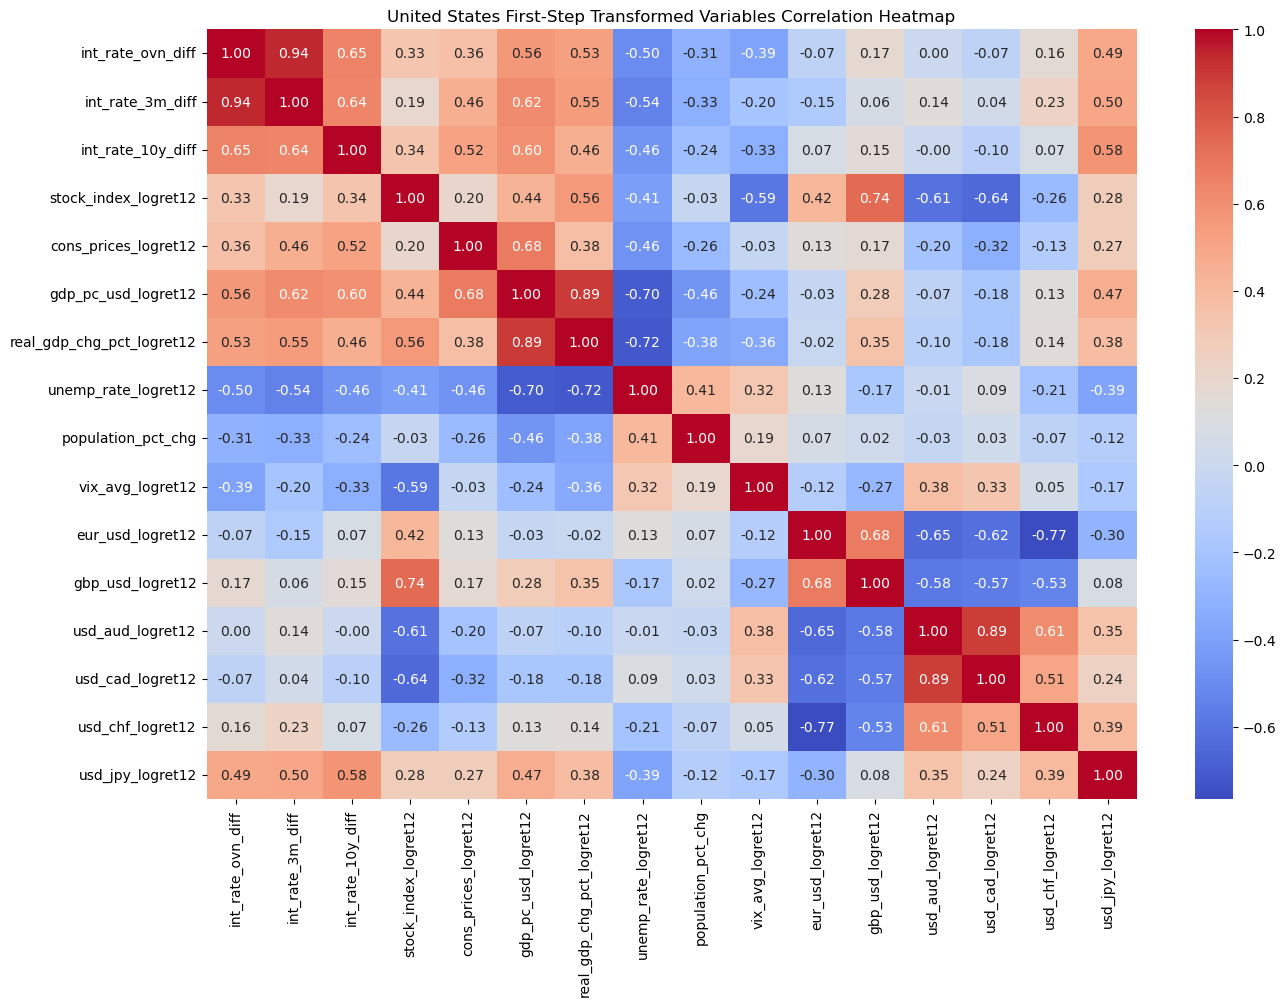

In [480]:
# Generate a correlation matrix heatmap for the first-step transformed variables in the sub_us dataframe

plt.figure(figsize=(15, 10))
sns.heatmap(sub_us.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("United States First-Step Transformed Variables Correlation Heatmap")
plt.show()

##### This correlation heatmap examines variables before necessary stationarization and z-score standardization (normalization, rescaling), which will come later.  Accordingly, there will likely be some spurious correlations within the matrix at this EDA stage.  The correlations measured are between mostly log return (12 months) first-step transformed variables, and to a lesser extent with a few first difference of % variables.

#### Preliminary Interpretation

##### The interest rate variables (for overnight, 3-month and 10-year time periods) unsurprisingly are highly correlated with each other (0.64-0.94). They are only moderately (0.36-0.52) positively correlated with inflation ('cons_prices_logret12') rather than strongly, surprising because Central Banks normally increase interest rates to tame inflation.  Inflation goes higher, interest rates follow suit.  Thus, correlations measured on lagged inflation vs interest rate series are likely more appropriate for that particular expected cause-effect dynamic. In the US in particular, the Federal Reserve Bank was famously slow to recognize and respond to Covid-19 era embedded inflation.

##### Interest rate variables show moderate-to-strong positive correlations (0.46-0.62) with population-normalized nominal GDP ('gdp_pc_usd_logret12') and real GDP ('real_gdp_chg_pct_logret12', which is inflation-adjusted), as expected since Central Banks use interest rate policy to moderate any higher growth scenarios that may cause inflation.

##### Interest rate variables show moderate-to-strong (-0.46 to -0.54) inverse (negative) correlations with the unemployment rate; this is expected as higher growth rates (which bring higher interest rates) of an economy will reduce unemployment.

##### Relative to different USD cross-currency pairs, the interest rate variables show moderately-strong positive correlations (0.49 - 0.58) for USDJPY (US Dollar versus Japanese Yen), but low or no correlations with other major currencies.  Both the USD and JPY currencies are considered safe havens, after CHF (the Swiss Franc), in times of crisis. 

##### The primary stock market index (NYSE) had moderate positive correlations (0.44-0.56) with GDP measures, moderate negative correlation with the unemployment rate (-0.41), but only weak-moderate positive correlations (0.19-0.34) with interest rates and inflation. As expected, it revealed a moderately strong negative correlation (-0.59) with the VIX, an equities options market-derived index known as a "fear gauge".  The more volatile the VIX, the greater the fear and uncertainty in the US equities market. Relative to different cross-currency pairs, moderate-to-strong correlations (positive, negative) show that USD weakens against GBP the most (0.74 for the so-called "cable rate"), CAD, AUD and EUR when the stock market is strong, or maybe it's the other way around, e.g. USD weakness helps the stock market climb.  Cause-and-effect difficult to ascertain.  Low US stock market correlation with other relative currency movements, e.g. CHF and JPY.

##### Inflation has the strongest, positive correlation (0.68) with population-normalized nominal GDP, but its relationship with Real GDP can be ignored as the latter metric is an inflation-adjusted measure of a country's domestic output.

##### Both types of GDP measures show a strong negative correlation (-0.70 to -0.72) with the unemployment rate, matching real world experience.

##### Annual population change correlations with other first-step transformed variables here are not useful, as changes in the former metric tend to be slow, gradual and on a different timescale (e.g. long term).

##### The VIX, a so-called "fear gauge", unsurprisingly finds its strongest correlation, a negative one (-0.59), with the primary US stock market (NYSE) log returns.

##### Ignoring USD cross-currency pairs correlation analysis against each other, which does not serve key goals of this project, it's helpful to measure these against other economic variables.  The main takeaways are the USD cross-currency pair strong negative correlations with the stock market, mentioned above for 4 of the 6 pairs, and the USDJPY's moderate-to-strong (0.38-0.58) positive correlations with interest rates and GDP measures, and moderate negative correlation (-0.39) with the unemployment rate.

#### FX, VIX, commodity indices, commodities

In [33]:
# Create a subset dataframe first to include only those variables of interest
sub_fx_vix_comm = fx_vix_comm_sub_copy[['aud_cad_logret12', 'aud_jpy_logret12', 'chf_aud_logret12', 'chf_cad_logret12', 'chf_jpy_logret12',\
       'eur_aud_logret12', 'eur_cad_logret12', 'eur_chf_logret12', 'eur_gbp_logret12', 'eur_jpy_logret12', 'eur_usd_logret12',\
       'gbp_aud_logret12', 'gbp_cad_logret12', 'gbp_jpy_logret12', 'gbp_usd_logret12', 'usd_aud_logret12', 'usd_cad_logret12',\
       'usd_chf_logret12', 'usd_jpy_logret12', 'vix_avg_logret12', 'all_comm_idx_avg_logret12', 'energy_idx_avg_logret12',\
       'wti_avg_logret12', 'brent_avg_logret12', 'nat_gas_eu_avg_logret12', 'lng_asia_avg_logret12', 'metals_idx_avg_logret12',\
       'iron_ore_avg_logret12', 'copper_avg_logret12', 'aluminum_avg_logret12', 'gold_oz_usd_logret12', 'food_idx_avg_logret12']]

### 04.02 Scatterplots

### Comment: All scatterplots here are of first-step transformed variables as log returns (annual) or first difference %'s. For brevity the short form of the variable name is used in plot labels and descriptive commentary.

### Note: Both versions of the GDP measure change data values annually rather than monthly, while all other variables (except population) change data values monthly, thus the scatterplots that include either GDP measure will have straight lines of dots representing this difference in measurement periodicity.

#### United States

In [668]:
# Check variables for candidate scatterplots based on the prior correlation heatmap results
sub_us.columns

Index(['int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff',
       'stock_index_logret12', 'cons_prices_logret12', 'gdp_pc_usd_logret12',
       'real_gdp_chg_pct_logret12', 'unemp_rate_logret12',
       'population_pct_chg', 'vix_avg_logret12', 'eur_usd_logret12',
       'gbp_usd_logret12', 'usd_aud_logret12', 'usd_cad_logret12',
       'usd_chf_logret12', 'usd_jpy_logret12'],
      dtype='object')

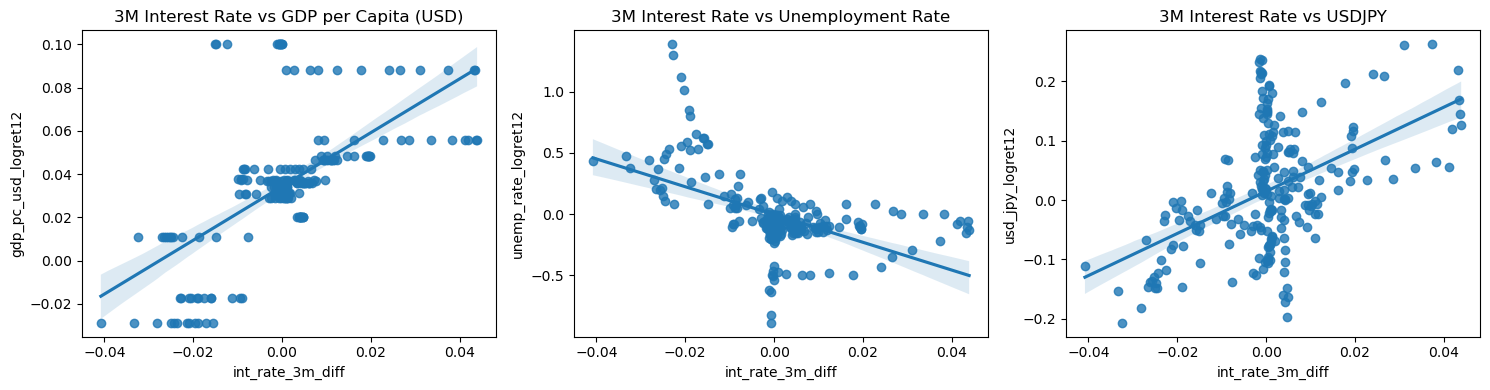

In [681]:
# Create 3 side-by-side scatterplots of different variables to use screen space efficiently

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# First scatterplot
sns.regplot(x='int_rate_3m_diff', y='gdp_pc_usd_logret12', data=sub_us, ax=axes[0])
axes[0].set_title('3M Interest Rate vs GDP per Capita (USD)')

# Second scatterplot
sns.regplot(x='int_rate_3m_diff', y='unemp_rate_logret12', data=sub_us, ax=axes[1])
axes[1].set_title('3M Interest Rate vs Unemployment Rate')

# Third scatterplot
sns.regplot(x='int_rate_3m_diff', y='usd_jpy_logret12', data=sub_us, ax=axes[2])
axes[2].set_title('3M Interest Rate vs USDJPY')

plt.tight_layout()
plt.show()

### These scatterplots all show non-linear relationships. However, visually they appear difficult to approximate with polynomial functions.

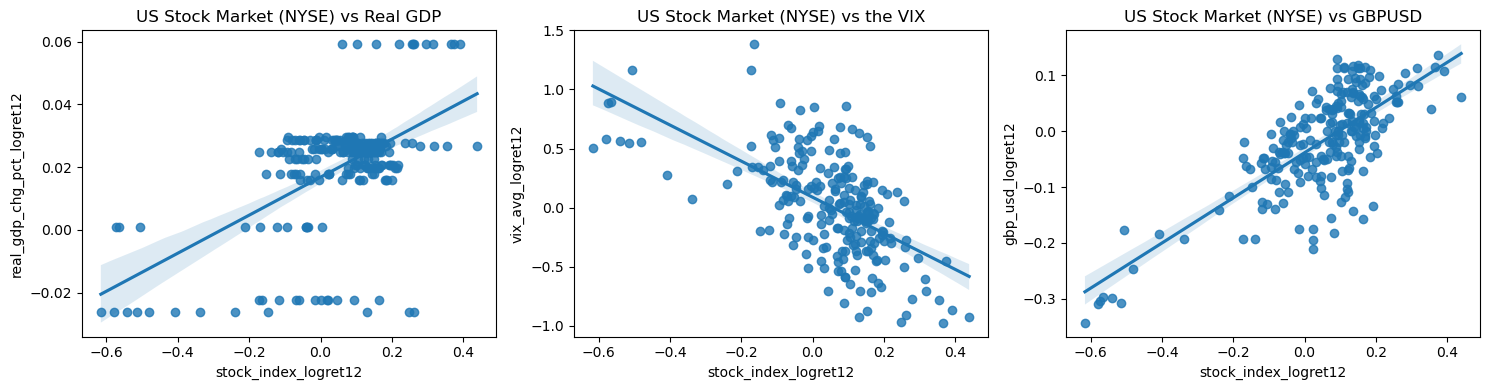

In [689]:
# More scatterplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.regplot(x='stock_index_logret12', y='real_gdp_chg_pct_logret12', data=sub_us, ax=axes[0])
axes[0].set_title('US Stock Market (NYSE) vs Real GDP')
sns.regplot(x='stock_index_logret12', y='vix_avg_logret12', data=sub_us, ax=axes[1])
axes[1].set_title('US Stock Market (NYSE) vs the VIX')
sns.regplot(x='stock_index_logret12', y='gbp_usd_logret12', data=sub_us, ax=axes[2])
axes[2].set_title('US Stock Market (NYSE) vs GBPUSD')
plt.tight_layout()
plt.show()

### The last two (2) scatterplots show more linear relationships between the variables. These underscore a clearly negative correlation between the stock market and the VIX, versus a positive correlation between the stock market and GBPUSD.  Stationarization, followed by z-score method normalization of the variables, may further improve on these preliminary best-fit regression line results. Visually the first scatterplot above (stock market against real GDP) is difficult to interpret, as were the first three scatterplots for the 3-month interest rate.

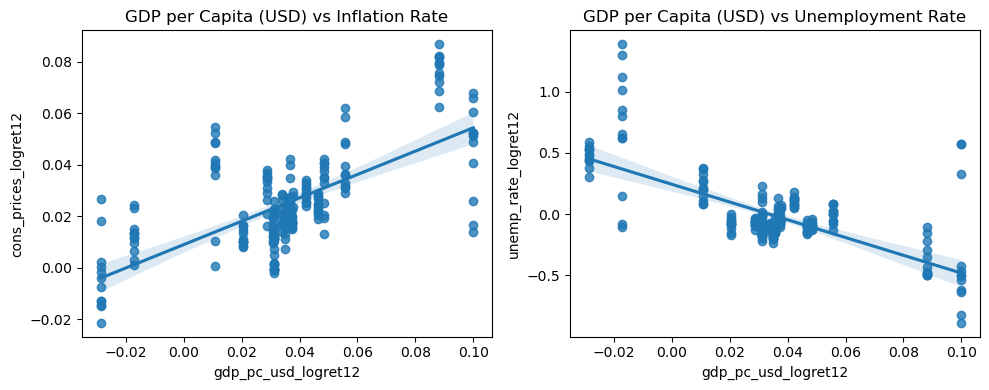

In [691]:
# Two more
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.regplot(x='gdp_pc_usd_logret12', y='cons_prices_logret12', data=sub_us, ax=axes[0])
axes[0].set_title('GDP per Capita (USD) vs Inflation Rate')
sns.regplot(x='gdp_pc_usd_logret12', y='unemp_rate_logret12', data=sub_us, ax=axes[1])
axes[1].set_title('GDP per Capita (USD) vs Unemployment Rate')
plt.tight_layout()
plt.show()

### These scatterplots show positive and negative correlations, respectively, with less variance based on vertical scale (y-axis) differences for the left-side plot as compared with the right-side plot.  Stationarization and z-score method normalization of the variables may improve on line fit for the apparent linear relationships portrayed.

### 04.03 Pair Plots

#### United States

In [867]:
# Check variables for candidate pair plots based on prior scatterplots
sub_us.columns

Index(['int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff',
       'stock_index_logret12', 'cons_prices_logret12', 'gdp_pc_usd_logret12',
       'real_gdp_chg_pct_logret12', 'unemp_rate_logret12',
       'population_pct_chg', 'vix_avg_logret12', 'eur_usd_logret12',
       'gbp_usd_logret12', 'usd_aud_logret12', 'usd_cad_logret12',
       'usd_chf_logret12', 'usd_jpy_logret12'],
      dtype='object')

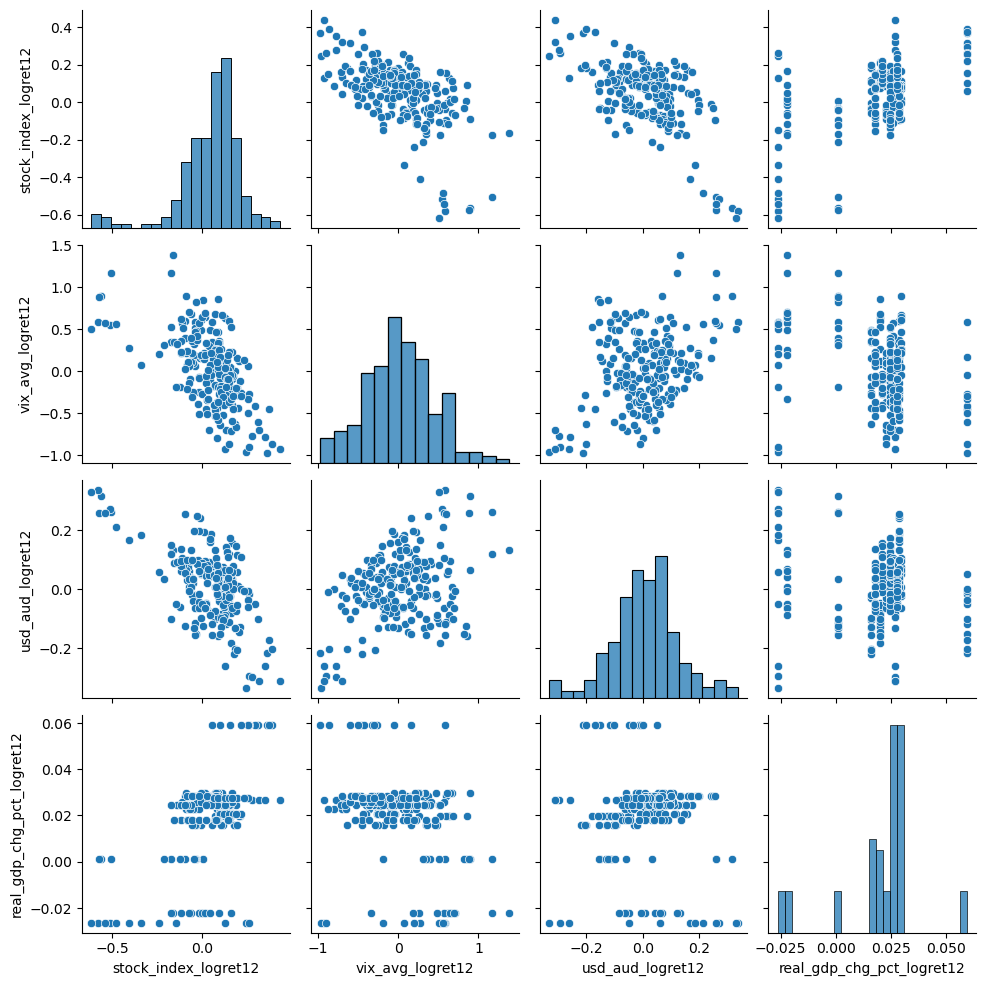

In [873]:
# Create a pair plot matrix
sub_us_1 = sub_us[['stock_index_logret12', 'vix_avg_logret12', 'usd_aud_logret12', 'real_gdp_chg_pct_logret12']]
p_us_1 = sns.pairplot(sub_us_1)

#### The four variables have approximately Normal frequency distributions. The Real GDP variable shows a "lumpy" distribution because the data measurement periodicity is annual, not monthly as for the other three variables plotted above.  Further exploration: (1) stock index vs VIX due to nature of their relationship and scatterplot supportive evidence; (2) stock index vs Real GDP as these are key macroeconomic variables and despite the lumpiness of GDP annual data, the scatterplot suggests a positive correlation between the two variables; and (3) stock index vs USDAUD to examine a US variable that impacts the FX cross-rate between the world's 3rd safe haven currency (USD) and the top "risk on" currency (AUD), within the 6 major currencies, and inasmuch as the scatterplot suggests a negative linear correlation.

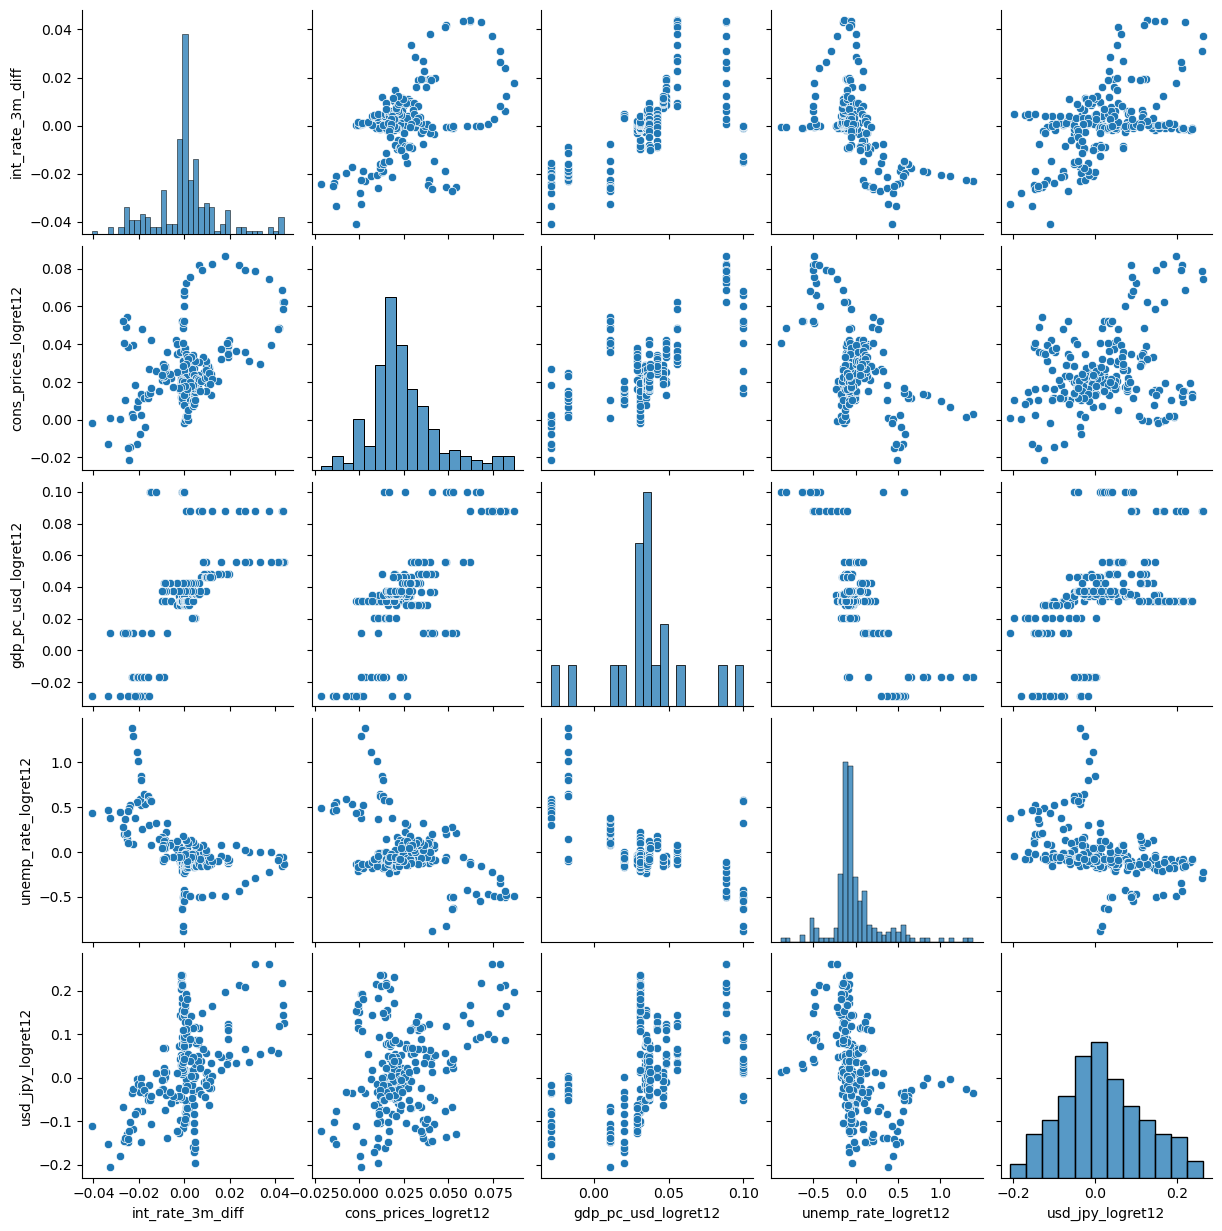

In [877]:
# Create another pair plot matrix
sub_us_2 = sub_us[['int_rate_3m_diff', 'cons_prices_logret12', 'gdp_pc_usd_logret12', 'unemp_rate_logret12', 'usd_jpy_logret12']]
p_us_2 = sns.pairplot(sub_us_2)

#### The five variables have approximately Normal frequency distributions with some subtle differences: the GDP per Capita variable shows a "lumpy" distribution because the data measurement periodicity is annual, not monthly as for the other four variables plotted above; the 3-month interest rate, GDP per Capita and unemployment rate variable distributions are "steep"; the inflation rate ('cons_prices') variable is right-skewed; and the USDJPY variable visually shows the closest approximation to a Normal distribution shape.  Further exploration: (1) 3-month interest rate vs inflation rate ('cons_prices) as US Fed policy uses interest rates to fight inflation, these two variables have a deep relationship, and the bizarre-shaped ("octopus") scatterplot, despite showing an expected positive correlation, hints at likely needed adjustments (i.e., time lagged correlation measurement and/or stationarization and z-score method rescaling) to find a good-fit linear or non-linear function; (2) 3-month interest rate vs USDJPY to understand impact if any on "carry trade" currencies, because the US and Japan are major trading partners, and the scatterplot points to a positive correlation despite the bizarre ("octopus", again) shape; (3) GDP per Capita vs inflation rate, as these major economic variables are typically positively correlated, important, and the scatterplot supports that notion; (4) GDP per Capita vs unemployment rate, where the expectation is that economic growth reduces unemployment, and the scatterplot supports that thesis; and (5) 3-month interest rate vs GDP per Capita, to confirm that Fed policy uses interest rates to moderate "hot" GDP growth (which engenders inflation), and the scatterplot supports the expected positive correlation between the two variables.

### 04.04 Categorical Plots

#### Disclosure: I engaged ChatGPT to create and name two custom-defined functions below -- namely, shockstack_grid and shockstack_kdegrid_v2 -- for some of the plot matrices in this section. This helped expedite further visualization of dozens of variables, conserve space and time, optimize formatting and legends and right-size grids with varying quantities of sub-plots.

#### The subset dataframes created for EDA correlation heatmaps and pair plots omitted the time variable but were all organized exactly the same way chronologically (and the year 2005 row data was omitted as all the first-step transformed variables as annual log returns, etc. had NaN values that year because monthly data began with Jan 2005), and consisted entirely of numerical variables (no categorical variables). Since these next visualizations target the addition of a categorical dimension, it makes sense now to add a column to the subset dataframes of interest that specifies which -- if any -- exogenous economic shock or shocks existed for the data values in each row (where each row corresponds to a month/year point in time). During normal times, when there were no shock(s) occurring, the categorical data value "No Shock" will be applied.  The goal of the categorical plots is to visually zero in on outlier x,y data points in the scatterplots to see which shock(s), if any, caused some or most of the extreme fluctuations.

#### First it's helpful to create an exogenous economic shock-specific subset dataframe, with a derived column 'shock_name' to name the shock(s) if any that existed at each point in time.

#### Begin by examining the fx_vix_comm_sub_copy subset dataframe on dimensions, content and column names, from which we will extract the shock-related columns to create another subset dataframe.

In [987]:
fx_vix_comm_sub_copy.shape

(231, 38)

In [991]:
fx_vix_comm_sub_copy.head(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,aud_cad_logret12,aud_jpy_logret12,chf_aud_logret12,chf_cad_logret12,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
0,2006-01-01,False,False,False,False,False,-0.066691,0.100485,-0.074108,-0.133531,...,0.335465,0.359997,0.414646,0.232039,0.248924,0.173926,0.403719,0.260799,0.259859,-0.008664
1,2006-02-01,False,False,False,False,False,-0.132060,0.064805,-0.038100,-0.167054,...,0.250573,0.285218,0.414646,0.257307,0.248784,0.173926,0.426659,0.264717,0.270769,-0.020714
2,2006-03-01,False,False,False,False,False,-0.133531,0.032516,-0.028171,-0.155755,...,0.146838,0.164536,0.414646,0.202498,0.225671,0.173926,0.416321,0.202034,0.250028,-0.032650


In [993]:
fx_vix_comm_sub_copy.tail(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,aud_cad_logret12,aud_jpy_logret12,chf_aud_logret12,chf_cad_logret12,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
228,2025-01-01,False,False,False,True,True,0.011173,0.004112,0.011364,0.012739,...,0.021216,-0.011698,0.437476,0.343717,-0.046635,-0.274710,0.072208,0.155268,0.286810,0.000664
229,2025-02-01,False,False,False,True,True,0.022473,-0.020073,0.005698,0.025642,...,-0.076930,-0.084259,0.637948,0.512185,0.009276,-0.151745,0.116488,0.197657,0.358192,-0.017491
230,2025-03-01,False,False,False,True,True,0.011173,-0.045619,0.045462,0.069870,...,-0.174869,-0.169132,0.433658,0.378025,0.043760,-0.061186,0.113314,0.173413,0.323844,-0.050646


In [995]:
fx_vix_comm_sub_copy.columns

Index(['timestamp', 'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag',
       'boj_int_rate_flag', 'aud_cad_logret12', 'aud_jpy_logret12',
       'chf_aud_logret12', 'chf_cad_logret12', 'chf_jpy_logret12',
       'eur_aud_logret12', 'eur_cad_logret12', 'eur_chf_logret12',
       'eur_gbp_logret12', 'eur_jpy_logret12', 'eur_usd_logret12',
       'gbp_aud_logret12', 'gbp_cad_logret12', 'gbp_jpy_logret12',
       'gbp_usd_logret12', 'usd_aud_logret12', 'usd_cad_logret12',
       'usd_chf_logret12', 'usd_jpy_logret12', 'vix_avg_logret12',
       'all_comm_idx_avg_logret12', 'energy_idx_avg_logret12',
       'wti_avg_logret12', 'brent_avg_logret12', 'nat_gas_eu_avg_logret12',
       'lng_asia_avg_logret12', 'metals_idx_avg_logret12',
       'iron_ore_avg_logret12', 'copper_avg_logret12', 'aluminum_avg_logret12',
       'gold_oz_usd_logret12', 'food_idx_avg_logret12'],
      dtype='object')

#### Create an exogenous economic shocks-specific subset dataframe, and then verify dimensions and content

In [1013]:
exo_shk_flags = fx_vix_comm_sub_copy[['timestamp', 'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag', 'boj_int_rate_flag']]

In [1015]:
exo_shk_flags.shape

(231, 6)

In [1017]:
exo_shk_flags.head(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag
0,2006-01-01,False,False,False,False,False
1,2006-02-01,False,False,False,False,False
2,2006-03-01,False,False,False,False,False


In [1019]:
exo_shk_flags.tail(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag
228,2025-01-01,False,False,False,True,True
229,2025-02-01,False,False,False,True,True
230,2025-03-01,False,False,False,True,True


#### Create and add a derived column 'shock_name' and applicable shock name categorical data values to the subset dataframe

In [1021]:
exo_shk_flags_copy = exo_shk_flags.copy()

In [1025]:
exo_shk_flags_copy.loc[exo_shk_flags_copy['gfc_flag'] == True, 'shock_name'] = 'GFC'

In [1031]:
exo_shk_flags_copy.loc[exo_shk_flags_copy['cpc_flag'] == True, 'shock_name'] = 'CPC'

In [1033]:
exo_shk_flags_copy.loc[(exo_shk_flags_copy['cov_19_flag'] == True) & (exo_shk_flags_copy['rus_ukr_war_flag'] == False), 'shock_name'] = 'Cov-19'

In [1035]:
exo_shk_flags_copy.loc[(exo_shk_flags_copy['cov_19_flag'] == True) & \
                       (exo_shk_flags_copy['rus_ukr_war_flag'] == True), 'shock_name'] = 'Cov-19 & Rus_Ukr_War'

In [1037]:
exo_shk_flags_copy.loc[(exo_shk_flags_copy['cov_19_flag'] == False) & (exo_shk_flags_copy['rus_ukr_war_flag'] == True) & \
                  (exo_shk_flags_copy['boj_int_rate_flag'] == False), 'shock_name'] = 'Rus_Ukr_War'

In [1039]:
exo_shk_flags_copy.loc[(exo_shk_flags_copy['cov_19_flag'] == False) & (exo_shk_flags_copy['rus_ukr_war_flag'] == True) & \
                  (exo_shk_flags_copy['boj_int_rate_flag'] == True), 'shock_name'] = 'Rus_Ukr_War & BOJ Pivot'

In [1045]:
exo_shk_flags_copy.loc[(exo_shk_flags_copy['gfc_flag'] == False) & (exo_shk_flags_copy['cpc_flag'] == False) & \
                       (exo_shk_flags_copy['cov_19_flag'] == False) & (exo_shk_flags_copy['rus_ukr_war_flag'] == False) & \
                       (exo_shk_flags_copy['boj_int_rate_flag'] == False), 'shock_name'] = 'No Shock'

#### Check the modified dataframe dimensions and content to verify that the 'shock_name' column derivation took place as intended

In [1047]:
exo_shk_flags_copy.shape

(231, 7)

In [1049]:
exo_shk_flags_copy['shock_name'].value_counts(dropna = False)

shock_name
No Shock                   132
GFC                         29
Cov-19                      23
Cov-19 & Rus_Ukr_War        16
Rus_Ukr_War & BOJ Pivot     13
CPC                          9
Rus_Ukr_War                  9
Name: count, dtype: int64

### Interesting result. The counts above (which count the number of months, since the data are monthly) tell us: normal economic conditions ("No Shock" periods) comprised only 57% (132/231) of the 19-year plus 3-month temporal range.  Conversely, shocks big (Great Financial Crisis, Covid-19) and small (2014 Commodity Price Collapse, still-ongoing Russia-Ukraine War and the still-ongoing 2024 Bank of Japan Interest Rate Pivot) in total comprised 43% of that temporal range.  We lurch from crisis to crisis, shock to shock.  Hence, this independent study project has the goal of understanding different types of past or current exogenous economic shocks' impact on some countries and asset classes, to help model potential outcomes for these variables based on the new shock that rolled out in April 2025, e.g. US tariff policy changes.

In [1051]:
exo_shk_flags_copy.head(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,shock_name
0,2006-01-01,False,False,False,False,False,No Shock
1,2006-02-01,False,False,False,False,False,No Shock
2,2006-03-01,False,False,False,False,False,No Shock


In [1053]:
exo_shk_flags_copy.tail(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,shock_name
228,2025-01-01,False,False,False,True,True,Rus_Ukr_War & BOJ Pivot
229,2025-02-01,False,False,False,True,True,Rus_Ukr_War & BOJ Pivot
230,2025-03-01,False,False,False,True,True,Rus_Ukr_War & BOJ Pivot


In [1055]:
# Export the exogenous shock-specific subset dataframe as backup, as it may prove useful later
exo_shk_flags_copy.to_pickle(os.path.join(path, 'Data','Prepared Data', 'exo_shk_flags_copy.pkl'))

#### United States

#### Add the 'shock_name' categorical variable from the 'exo_shk_flags_copy' dataframe to the earlier-created 'sub_us' subset dataframe filtered for the United States, in order to overlay this categorical variable on scatterplots, histograms and KDE (Kernel Density Estimate) plots.

In [1079]:
sub_us_1_copy = sub_us.copy()

In [1083]:
sub_us_1_copy['shock_name'] = exo_shk_flags_copy['shock_name']

In [1262]:
sub_us_1_copy.shape

(231, 17)

In [1089]:
sub_us_1_copy.head(3)

,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,vix_avg_logret12,eur_usd_logret12,gbp_usd_logret12,usd_aud_logret12,usd_cad_logret12,usd_chf_logret12,usd_jpy_logret12,shock_name
0,0.0201,0.0195,0.0020,0.124852,0.039001,0.048386,0.027615,-0.120144,0.009689,-0.110001,-0.094559,-0.065958,0.022642,-0.042200,0.098440,0.122941,No Shock
1,0.0199,0.0195,0.0040,0.105110,0.035330,0.048386,0.027615,-0.117783,0.009689,0.062883,-0.088411,-0.071656,0.053245,-0.075349,0.088411,0.116280,No Shock
2,0.0196,0.0191,0.0022,0.117391,0.033043,0.048386,0.027615,-0.101096,0.009689,-0.116166,-0.095310,-0.093218,0.075794,-0.050431,0.113023,0.108494,No Shock


In [1264]:
sub_us_1_copy.tail(3)

,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,vix_avg_logret12,eur_usd_logret12,gbp_usd_logret12,usd_aud_logret12,usd_cad_logret12,usd_chf_logret12,usd_jpy_logret12,shock_name
228,-0.01,-0.0093,0.0057,0.151096,0.029607,0.037657,0.01784,0.077962,0.02117,0.224487,-0.046957,-0.032003,0.064125,0.071973,0.056512,0.068870,Rus_Ukr_War & BOJ Pivot
229,-0.01,-0.0088,0.0024,0.144901,0.027793,0.037657,0.01784,0.050010,0.02117,0.193819,-0.037740,-0.007968,0.038466,0.057570,0.022473,0.013870,Rus_Ukr_War & BOJ Pivot
230,-0.01,-0.0100,0.0007,0.077757,0.023622,0.037657,0.01784,0.050010,0.02117,0.459799,-0.009217,0.015625,0.038466,0.064539,-0.011300,-0.004817,Rus_Ukr_War & BOJ Pivot


In [1099]:
sub_us_1_copy.columns

Index(['int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff',
       'stock_index_logret12', 'cons_prices_logret12', 'gdp_pc_usd_logret12',
       'real_gdp_chg_pct_logret12', 'unemp_rate_logret12',
       'population_pct_chg', 'vix_avg_logret12', 'eur_usd_logret12',
       'gbp_usd_logret12', 'usd_aud_logret12', 'usd_cad_logret12',
       'usd_chf_logret12', 'usd_jpy_logret12', 'shock_name'],
      dtype='object')

#### Create a United States scatterplots grid for those variable correlations identified in the prior section "04.03 Pair Plots" for further exploration, adding a categorical variable ('shock_name') to reveal any exogenous economic shock-related patterns in the data pairs.  Save and export the grid visualization.

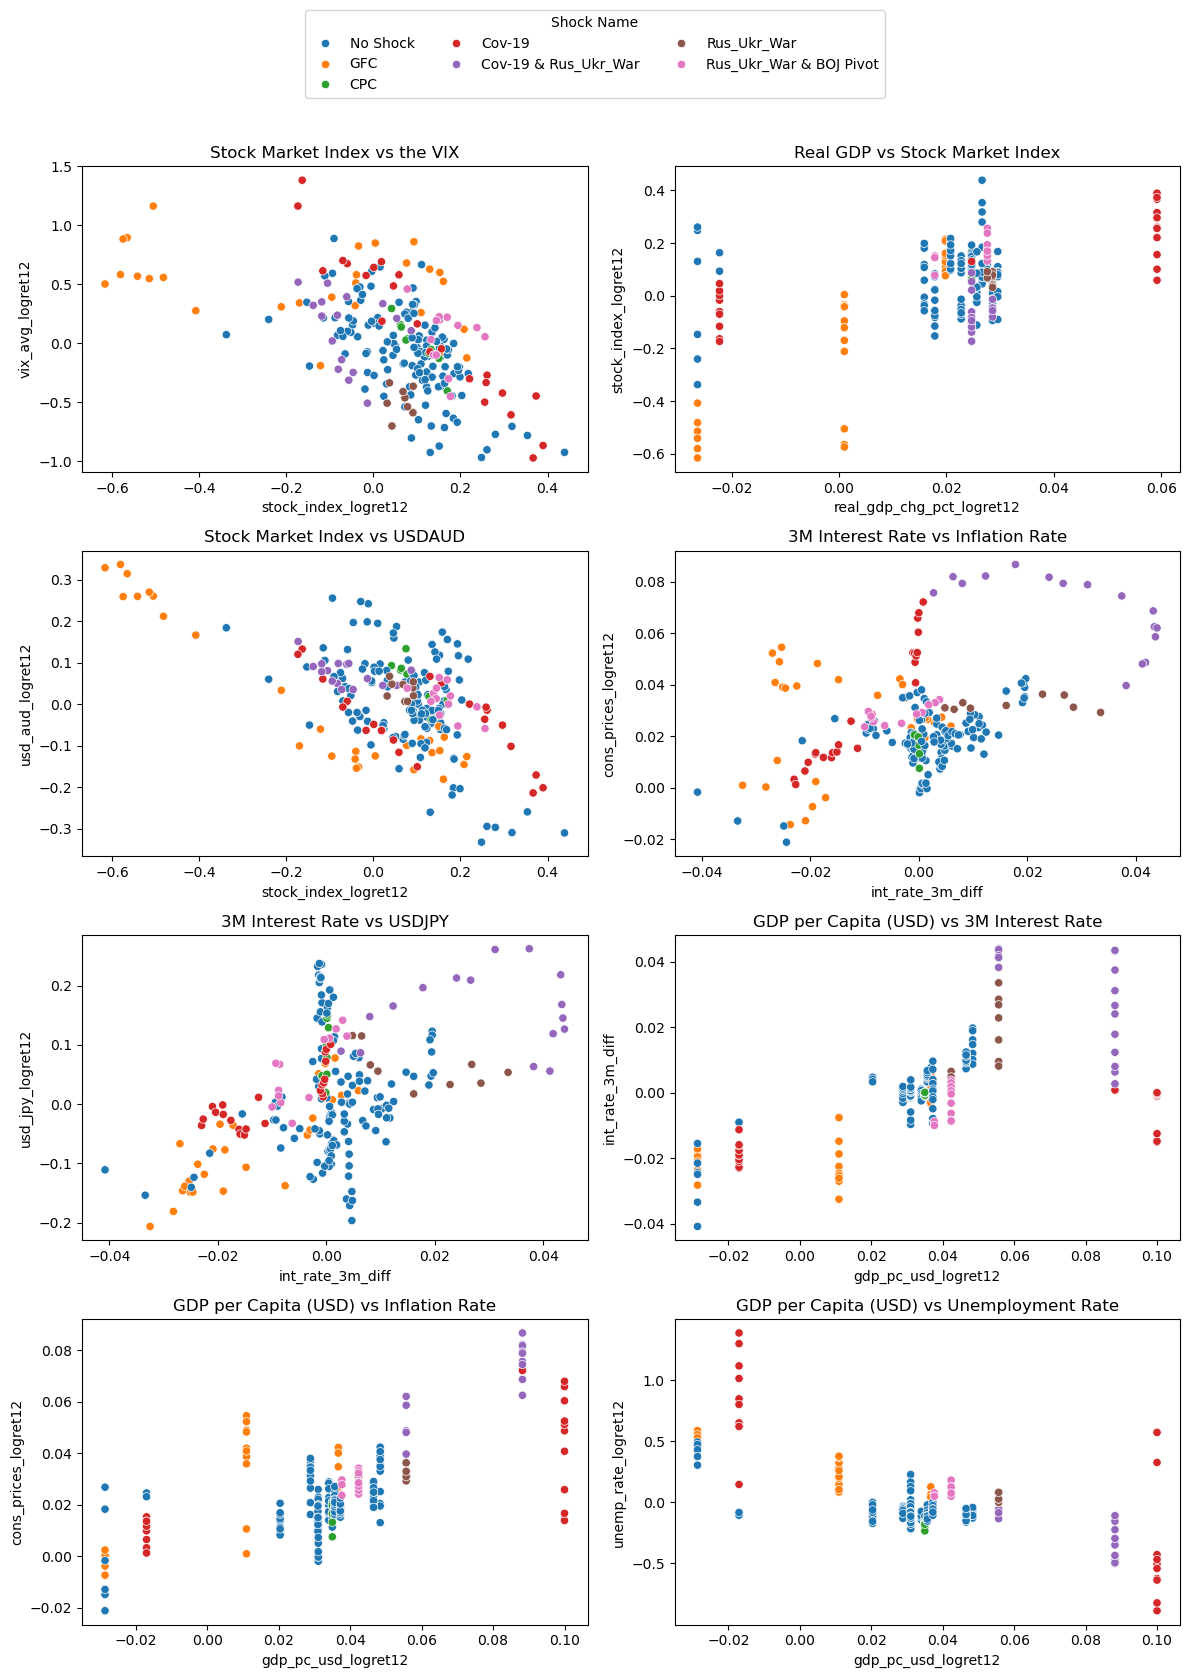

In [1131]:
# Create a 4 x 2 grid of subplots
fig, axes = plt.subplots(4, 2, figsize=(12, 16))
plot_kwargs = dict(data=sub_us_1_copy, hue='shock_name', legend=False)

# Create scatterplots without individual legends
sns.scatterplot(x='stock_index_logret12', y='vix_avg_logret12', ax=axes[0, 0], **plot_kwargs)
axes[0, 0].set_title('Stock Market Index vs the VIX')

sns.scatterplot(x='real_gdp_chg_pct_logret12', y='stock_index_logret12', ax=axes[0, 1], **plot_kwargs)
axes[0, 1].set_title('Real GDP vs Stock Market Index')

sns.scatterplot(x='stock_index_logret12', y='usd_aud_logret12', ax=axes[1, 0], **plot_kwargs)
axes[1, 0].set_title('Stock Market Index vs USDAUD')

sns.scatterplot(x='int_rate_3m_diff', y='cons_prices_logret12', ax=axes[1, 1], **plot_kwargs)
axes[1, 1].set_title('3M Interest Rate vs Inflation Rate')

sns.scatterplot(x='int_rate_3m_diff', y='usd_jpy_logret12', ax=axes[2, 0], **plot_kwargs)
axes[2, 0].set_title('3M Interest Rate vs USDJPY')

sns.scatterplot(x='gdp_pc_usd_logret12', y='int_rate_3m_diff', ax=axes[2, 1], **plot_kwargs)
axes[2, 1].set_title('GDP per Capita (USD) vs 3M Interest Rate')

sns.scatterplot(x='gdp_pc_usd_logret12', y='cons_prices_logret12', ax=axes[3, 0], **plot_kwargs)
axes[3, 0].set_title('GDP per Capita (USD) vs Inflation Rate')

sns.scatterplot(x='gdp_pc_usd_logret12', y='unemp_rate_logret12', ax=axes[3, 1], **plot_kwargs)
axes[3, 1].set_title('GDP per Capita (USD) vs Unemployment Rate')

# Create a dummy plot to extract legend handles and labels
dummy_fig, dummy_ax = plt.subplots()
dummy_plot = sns.scatterplot(x='stock_index_logret12', y='vix_avg_logret12', hue='shock_name', data=sub_us_1_copy, ax=dummy_ax)
handles, labels = dummy_ax.get_legend_handles_labels()
plt.close(dummy_fig)  # Close dummy plot so it doesn't show

# Add single legend to the full grid
fig.legend(handles, labels, title='Shock Name', loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3)

plt.tight_layout(rect=[0, 0, 1, 0.97])

# Save figure as a high-resolution image
path = r'C:\Users\dirk8\CareerFoundry Projects\05-2025 Exogenous Shocks Analysis'
fig.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'us_scat_pre_stat.png'), dpi=300, bbox_inches='tight')

plt.show()

#### The scatterplots in the grid (above), which now include the added categorical variable 'shock_name' overlay, reveal that two exogenous economic shocks, the GFC (Global Financial Crisis) and Covid-19 (as Covid-19 solo plus the later Covid-19/Russia-Ukraine War overlapping temporal period), were responsible for many of the outlier data points in the dataset. (This pattern of outlier drivers will likely repeat in the six other countries to review below, and separately the FX/commodities dataset.)  The 3-month interest rate vs inflation rate, and the 3-month interest rate vs USDJPY scatterplots have a decidedly odd octopus or squid-like shape.  The former scatterplot in particular, when grouping all the shock period data points but excluding normal ("No Shock") periods, shows a clear positive correlation.  However, if we look at just the normal ("No Shock") period data points (blue color), the pattern resembles a lopsided-wing dragonfly, with the body on a slightly off-vertical leftward skew.  Deriving best-fit linear regression lines for shock period vs normal period (no shock) data subsets for that pair (3-month interest rate vs USDJPY) would generate completely different lines and Pearson's correlation coefficients.

#### Define a custom function to create a grid of KDE (Kernel Density Estimate) plots which are useful for visualizing frequency distribution shape: normality, skewness, modality.  These can help compare shifts in the mean and variance of the categorical variable groups, and work well on smaller dataframes, applicable here.

In [1139]:
def shockstack_kdegrid_v2(df, vars_to_plot, hue='shock_name', cols=3, figsize_per_plot=(4, 3), 
                           common_xlim=True, save=False, filename=None, filetype='png', output_dir='.'):
    import seaborn as sns
    import matplotlib.pyplot as plt
    import numpy as np
    import math
    import os
    import pandas as pd

    num_vars = len(vars_to_plot)
    rows = math.ceil(num_vars / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(figsize_per_plot[0]*cols, figsize_per_plot[1]*rows), constrained_layout=True)
    axes = axes.flatten()

    categories = df[hue].dropna().unique()
    palette = sns.color_palette("tab10", len(categories))

    if common_xlim:
        global_min = min(df[var].min() for var in vars_to_plot)
        global_max = max(df[var].max() for var in vars_to_plot)

    for i, var in enumerate(vars_to_plot):
        ax = axes[i]
        sub_df = df[[var, hue]].dropna()

        for j, category in enumerate(categories):
            sns.kdeplot(
                data=sub_df[sub_df[hue] == category],
                x=var,
                ax=ax,
                label=category,
                color=palette[j],
                fill=True,
                alpha=0.4,
                linewidth=1.2
            )
        ax.set_title(var, fontsize=10)
        if common_xlim:
            ax.set_xlim(global_min, global_max)
        ax.set_xlabel("")
        ax.set_ylabel("Density")

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    handles = [plt.Line2D([0], [0], color=palette[i], lw=3, label=cat) for i, cat in enumerate(categories)]
    fig.legend(handles, categories, title=hue, loc='upper right', bbox_to_anchor=(1.15, 0.95), fontsize=8)

    plt.suptitle("KDE Frequency Distributions by Shock Event", fontsize=14)

    if save:
        if filename is None:
            timestamp = pd.Timestamp.now().strftime("%Y%m%d_%H%M%S")
            filename = f"shockstack_kdegrid_{timestamp}.{filetype}"
        else:
            filename = f"{filename}.{filetype}" if not filename.endswith(f".{filetype}") else filename

        full_path = os.path.join(output_dir, filename)
        plt.savefig(full_path, dpi=300, bbox_inches='tight')
        print(f"✅ Saved to: {full_path}")

    plt.show()

#### Run the shockstack_kdegrid_v2 function on the individual variables used in the scatterplot grid with categorical variable overlay (above), to review the visualization output.

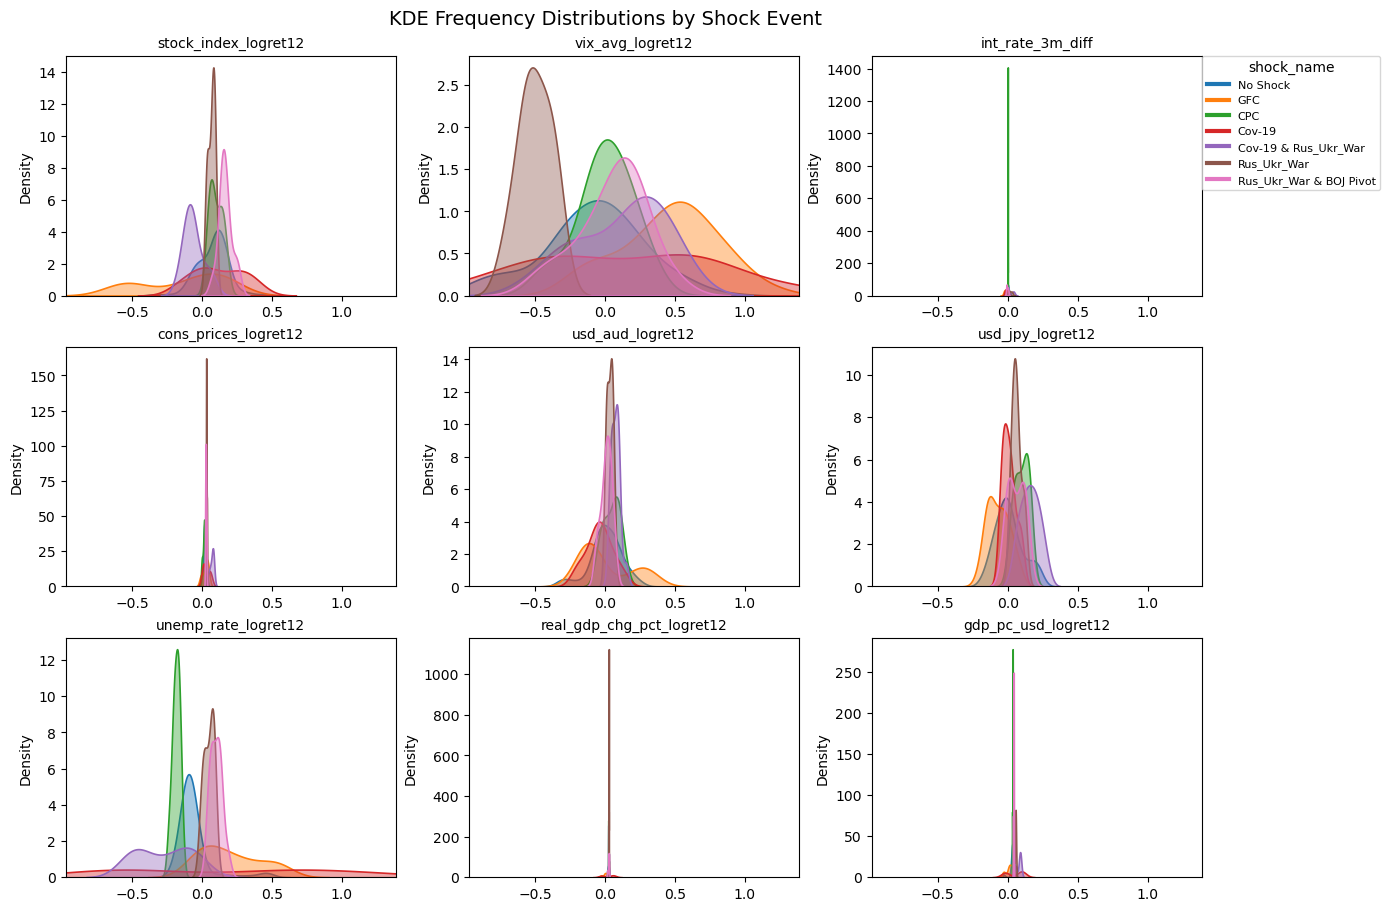

In [1145]:
us_scat_vars = ['stock_index_logret12', 'vix_avg_logret12', 'int_rate_3m_diff', 'cons_prices_logret12', 'usd_aud_logret12',\
                'usd_jpy_logret12', 'unemp_rate_logret12', 'real_gdp_chg_pct_logret12', 'gdp_pc_usd_logret12']

shockstack_kdegrid_v2(
    df=sub_us_1_copy,
    vars_to_plot=us_scat_vars,
    save=False
)

#### The grid of frequency distributions with categorical variable overlay above is too "busy" with the shock-specific overlapping curves, thus a stacked bar histogram may be easier to read visually. Define a custom function to create a grid of histograms for selected variables, with a categorical variable overlay.

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

def shockstack_grid(df, vars_to_plot, hue='shock_name', bins=20, cols=3, figsize_per_plot=(6, 5),
                     save=False, filename=None, filetype='png', output_dir='.'):
    """
    Plots a grid of color-stacked histograms for selected variables using the 'hue' column (default: 'shock_name').

    Parameters:
        df (pd.DataFrame): DataFrame containing the data.
        vars_to_plot (list of str): List of up to 9 numeric variable names to include.
        hue (str): Column name to use for stacked colors (e.g., 'shock_name').
        bins (int): Number of bins for histogram.
        cols (int): Number of columns in the subplot grid (2 or 3 recommended).
        figsize_per_plot (tuple): Size per subplot (width, height).
        save (bool): If True, saves to disk.
        filename (str): If "save" chosen, specify the filename for the output.
        filetype (str) : If "save" chosen, optional other formats include 'pdf', otherwise defaults to 'png'.
        output_dir (str): Path where figures are saved.
    """
    num_vars = len(vars_to_plot)
    rows = math.ceil(num_vars / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(figsize_per_plot[0] * cols, figsize_per_plot[1] * rows), constrained_layout=True)
    axes = axes.flatten() if num_vars > 1 else [axes]
    
    # Define color palette
    categories = df[hue].dropna().unique()
    palette = sns.color_palette("tab10", len(categories))
    color_dict = dict(zip(categories, palette))
    
    for i, var in enumerate(vars_to_plot):
        ax = axes[i]
        # Drop NA rows for variable and hue
        sub_df = df[[var, hue]].dropna()

        # Create binned intervals
        bin_counts = pd.cut(sub_df[var], bins=bins)
        
        # Cross-tabulate
        ctab = pd.crosstab(bin_counts, sub_df[hue])

        # Ensure consistent order
        ctab = ctab[categories]  # match hue order to color_dict

        # Plot stacked bar
        ctab.plot(kind='bar', stacked=True, ax=ax, color=[color_dict[c] for c in categories], edgecolor='black', linewidth=0.3, legend=False)

        ax.set_title(var, fontsize=10)
        ax.set_xlabel("")
        ax.set_ylabel("Count")
        ax.tick_params(axis='x', labelrotation=45)

    # Turn off unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    # Central legend
    handles = [plt.Rectangle((0, 0), 1, 1, color=color_dict[c]) for c in categories]
    fig.legend(handles, categories, title=hue, loc='upper right', bbox_to_anchor=(0.97, 1.05), fontsize=8)
    
    plt.suptitle("Stacked Histograms by Shock Event", fontsize=14)

    if save:
        if filename is None:
            timestamp = pd.Timestamp.now().strftime("%Y%m%d_%H%M%S")
            filename = f"shockstack_grid_{timestamp}.{filetype}"
        else:
            filename = f"{filename}.{filetype}" if not filename.endswith(f".{filetype}") else filename

        full_path = os.path.join(output_dir, filename)
        plt.savefig(full_path, dpi=300, bbox_inches='tight')
        print(f"✅ Saved to: {full_path}")
    
    plt.show()


#### Run the shockstack_grid function on the individual variables used in the scatterplot grid with categorical variable overlay (above), to review the visualization output, in particular the outlier data values.

✅ Saved to: C:\Users\dirk8\CareerFoundry Projects\05-2025 Exogenous Shocks Analysis\Analysis\Visualizations\us_hist_pre_stat.png


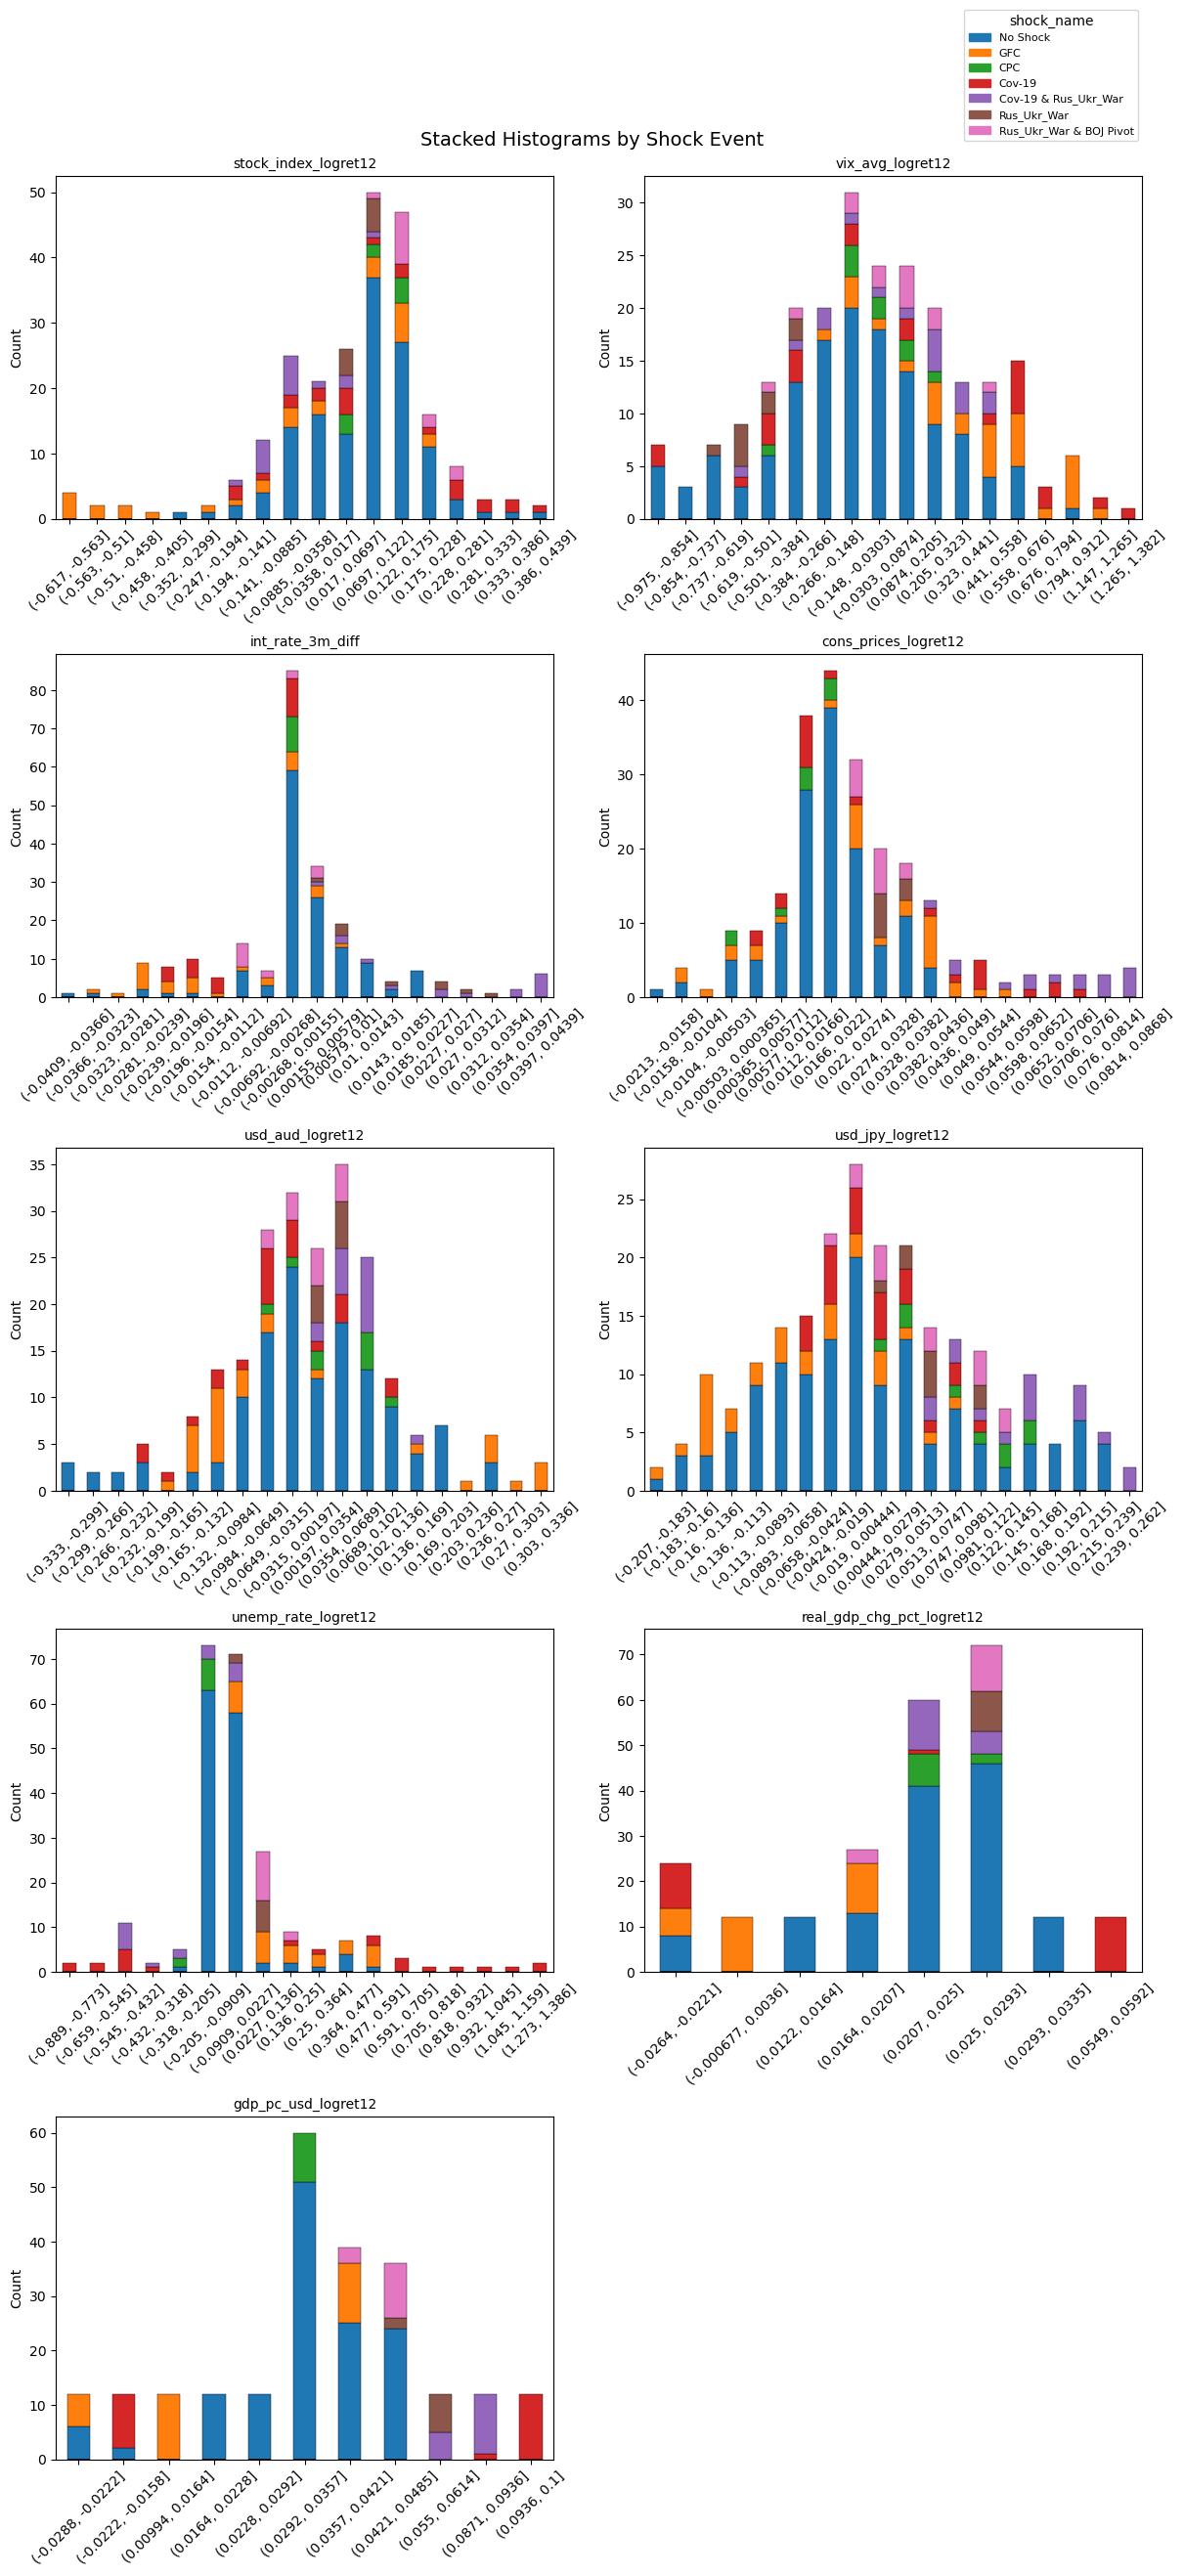

In [1242]:
us_scat_vars = ['stock_index_logret12', 'vix_avg_logret12', 'int_rate_3m_diff', 'cons_prices_logret12', 'usd_aud_logret12',\
                'usd_jpy_logret12', 'unemp_rate_logret12', 'real_gdp_chg_pct_logret12', 'gdp_pc_usd_logret12']

shockstack_grid(df=sub_us_1_copy, vars_to_plot=us_scat_vars, hue='shock_name', bins=20, cols=2, save=True, filename='us_hist_pre_stat',\
                output_dir=r'C:\Users\dirk8\CareerFoundry Projects\05-2025 Exogenous Shocks Analysis\Analysis\Visualizations')

#### The stacked bar histograms give us a tremendous amount of information.  The shock periods dominate the left and right tails of the frequency distributions, for the most part.  The unemployment rate and GDP per capita (USD) histograms are prime examples of that dynamic.  Curve shape can also change somewhat when changing the x-axis bin size.  Examining a shock color's distribution to the left and right sides of the Modal column, variable by variable, reveals whether a shock produced only one-sided (negative or positive log returns or first difference %'s, depending on the variable) moves for that variable, or whether there was a mean-reversion pendulum swing phenomenon (which would show a spread across both sides of the Modal column).  For example the unemployment rate histogram shows that the GFC shock produced mostly-right skewed data values (increased unemployment), while the Covid-19 and overlapping Covid-19/Russia-Ukraine War periods produced a mean-reversion pendulum swing phenomenon. The unemployment rate skyrocketed to a peak in the early stages of the crisis, then plummeted sharply as the Federal Reserve and US government agencies rolled out aggressive monetary (quantitative easing) and fiscal policy programs to "save the day", so to speak.  Thus, additional key questions for this independent study project include: "Which variables experience mean-reversion tendencies (versus one-sided moves) during shock periods, and does this phenomenon vary across shock type, country and/or asset class (in the FX and commodities dataset)?  If there are any sharp differences between countries, did those countries' relative differences in government intervention versus market forces mostly explain the dichotomy?"

In [1244]:
# Export the United States subset dataframe that was modified for use in categorical plots
path = r'C:\Users\dirk8\CareerFoundry Projects\05-2025 Exogenous Shocks Analysis'
sub_us_1_copy.to_pickle(os.path.join(path, 'Data','Prepared Data', 'us_cat_pre_stat.pkl'))

### 04.05 EDA preliminary findings

### Findings below are based on all parts or segments of the EDA.  There are several more 6.2 ESA Task 6.2 jupyter notebooks with visualizations for the other OECD countries examined.

### In the prior Task 6.1 examination of line plots for select raw data variables for countries, FX pairs, the VIX, commodity indices and commodities, and a preliminary "first-look" decomposition of time series data for a few of these variables (trend behavior, seasonality and residuals profile), we learned that exogenous shocks had a pronounced impact on some variables but less so on others.  However, the exploratory decompositions suggested many of the variables are non-stationary. This preliminary look did not drill down further to assess variable stationarity for each shock period vs normal "non-shock" periods.

### In the current Task 6.2 EDA (Exploratory Data Analysis), we used correlation matrix heatmaps, scatterplots, histograms and variations of the latter two by adding a categorical variable (shock name or "no shock") overlay, to examine relationships between first-step transformed (to annual log returns and first differences of %'s) variable pairs that demonstrated moderate-to-high positive or negative correlations. However, this work was preliminary because non-stationary variables (many or most) have not yet been stationarized, nor have these been normalized (standardized, rescaled) via the z-score method for better comparability, after stationarization. If there is any Deep Learning algorithm work later, then the "minmax" rather than z-score method will be applied to rescale variables.

### The lumpiness of the two GDP measures, based on the annual periodicity of their measurement (e.g. not monthly averages like all other variables except population growth, which is also annual), made the scatterplots involving either GDP measure more difficult to read and the histograms less insightful or significant. This might argue for omitting those two variables from further analysis and as inputs to AI/ML predictive models.

### EDA confirmed or supported many "expected" relationships between variables, with occasional surprises (i.e., the Japanese and South Korean stock markets are polar opposites in their reaction to local currency strength or weakness against the USD, for log returns-based comparisons).  In upcoming Tasks, linear fitting in some cases will need to be jettisoned for non-linear functions to optimize line fit, for predictive modelling (if that data is not clustered into shock-specific "groups" that enable linear function-based approximations to work well).

### Risk-avoidance and risk-seeking tradeoffs surfaced in the correlation dynamics of specific variables, notably the CHF (Swiss Franc), JPY (Japanese Yen) and USD (US Dollar), each representing flight-to-safety "safe havens", in descending order, that manifest during shock periods, when matched against other variables.  Meanwhile, the AUD (Australian Dollar) and CAD (Canadian Dollar, similar to AUD in behavior) occupy the opposite end of the risk spectrum, representing "risk on" optimistic sentiment, among the FX majors and in a global context.  These surfaced predictable tradeoffs, and also confirmed that both currencies respond nicely to commodities-based inflation, which is anathema to other major currencies. Norway was included in the country-level subset dataframes for its relationship with crude oil and natural gas, and its meteoric stock market climb over the last two decades, which invites analysis. Small (population-wise) can be beautiful.

### The Energy sub-index, a constituent of the All-Commodities (benchmark or "parent") index, had the highest correlation and best linear fit with All-Commodities, more so than either the Food or Metals sub-indices.  It was also the most volatile, through periodic crises and normal times.

### A key finding, which will not likely change once stationarization and standardization (of variables, where needed) takes place, is the mean-reversion tendency of (typically shock period-triggered) price, level or % swings that move in one direction, to reverse and "mean-revert" to near their point of origin or pendulum-swing well past, as happened for some variables (the US inflation rate for example, during the Global Financial Crisis).  Meanwhile, other variables (Gold price, CHF or the Norwegian stock market all come to mind) demonstrated strong secular directional moves over the decades, and were less impacted (relatively speaking) than other variables by various exogenous shocks.  Negligible mean-reversion behavior there. Why are these particularly resilient?  Same question for countries like Switzerland or Norway, both with small populations but exemplary government, central banks, healthcare and educational systems.

### One tentative null hypothesis to test in this ESA (Exogenous Shocks Analysis) project is the following: "Exogenous shock periods do not cause a significant increase (95%+ confidence level) in the standard deviation of the frequency distribution curve of key variables, versus normal non-shock periods."  This might be approached via an F-test comparing variances of variables for shock vs non-shock periods.  The result of such hypothesis test may help inform temporal period selection (optimization) in predictive modeling potential paths for certain variables that are impacted by currently-evolving US tariff policy changes.